# Análise da Frota de Veículos por Tipo e Região no Brasil

## Introdução:
A mobilidade urbana e regional é um componente essencial do desenvolvimento socioeconômico de qualquer país. No Brasil, a frota de veículos reflete não apenas o crescimento e as transformações da sociedade, mas também as particularidades geográficas e econômicas de suas diversas regiões. Compreender a composição e a evolução dessa frota por tipo de veículo e distribuição regional é fundamental para futuras análises de padrões de deslocamento, planejar infraestruturas de transporte e desenvolver políticas públicas que atendam às necessidades de uma população em constante movimento.

Este estudo se propõe a explorar a dinâmica da frota veicular brasileira, investigando como os diferentes tipos de veículos se distribuem pelo território nacional e como essa distribuição tem evoluído ao longo do tempo.

## Escolha e Contextualização dos Dados

A base para esta análise da frota de veículos no Brasil provém de fontes oficiais e abrangentes, garantindo a robustez e a confiabilidade das informações apresentadas. O principal conjunto de dados utilizado é proveniente do **Departamento Nacional de Trânsito (DENATRAN)**, agora parte da **Secretaria Nacional de Trânsito (SENATRAN)**. Especificamente, foram utilizados os relatórios estatísticos periódicos que detalham a frota de veículos registrada no país, segmentada por tipo de veículo, unidade federativa e, consequentemente, por grande região.

A escolha por esta fonte de dados se justifica por sua natureza oficial e pela granularidade das informações disponibilizadas. Os relatórios do SENATRAN consolidam os registros de todos os veículos licenciados no território nacional, oferecendo uma visão completa e padronizada da frota ao longo do tempo. Isso permite não apenas quantificar o número de veículos de cada tipo em circulação, mas também rastrear sua distribuição geográfica e observar a evolução histórica.

Para a análise do período mais recente, focada nos últimos meses (maio de 2024 a maio de 2025, conforme os arquivos de dados disponíveis), foram processados arquivos individuais, em formato `.xlsx`, que representam snapshots da frota em meses específicos. A integração desses arquivos em uma única base de dados foi crucial para permitir a análise temporal e a comparação entre diferentes períodos e regiões. Durante o processo de unificação, foram realizadas etapas de limpeza e padronização, incluindo: Identificação e Seleção de Arquivos, Leitura e Consolidação, Limpeza e Padronização de Colunas, Tratamento de Dados Ausentes e Tipos de Dados e Inclusão de Metadados.

Para a análise de longo prazo, cobrindo o período de 2010 a 2024, foi utilizada uma base lida a partir de um arquivo CSV. Esta base já apresentava os dados agregados por ano, região e tipo de veículo, simplificando o processo de análise histórica. No entanto, também foram necessárias algumas etapas de limpeza e padronização, como a remoção de espaços em branco nos nomes das colunas e a conversão da coluna de quantidade para o tipo numérico adequado.



## De 2010 a 2024



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


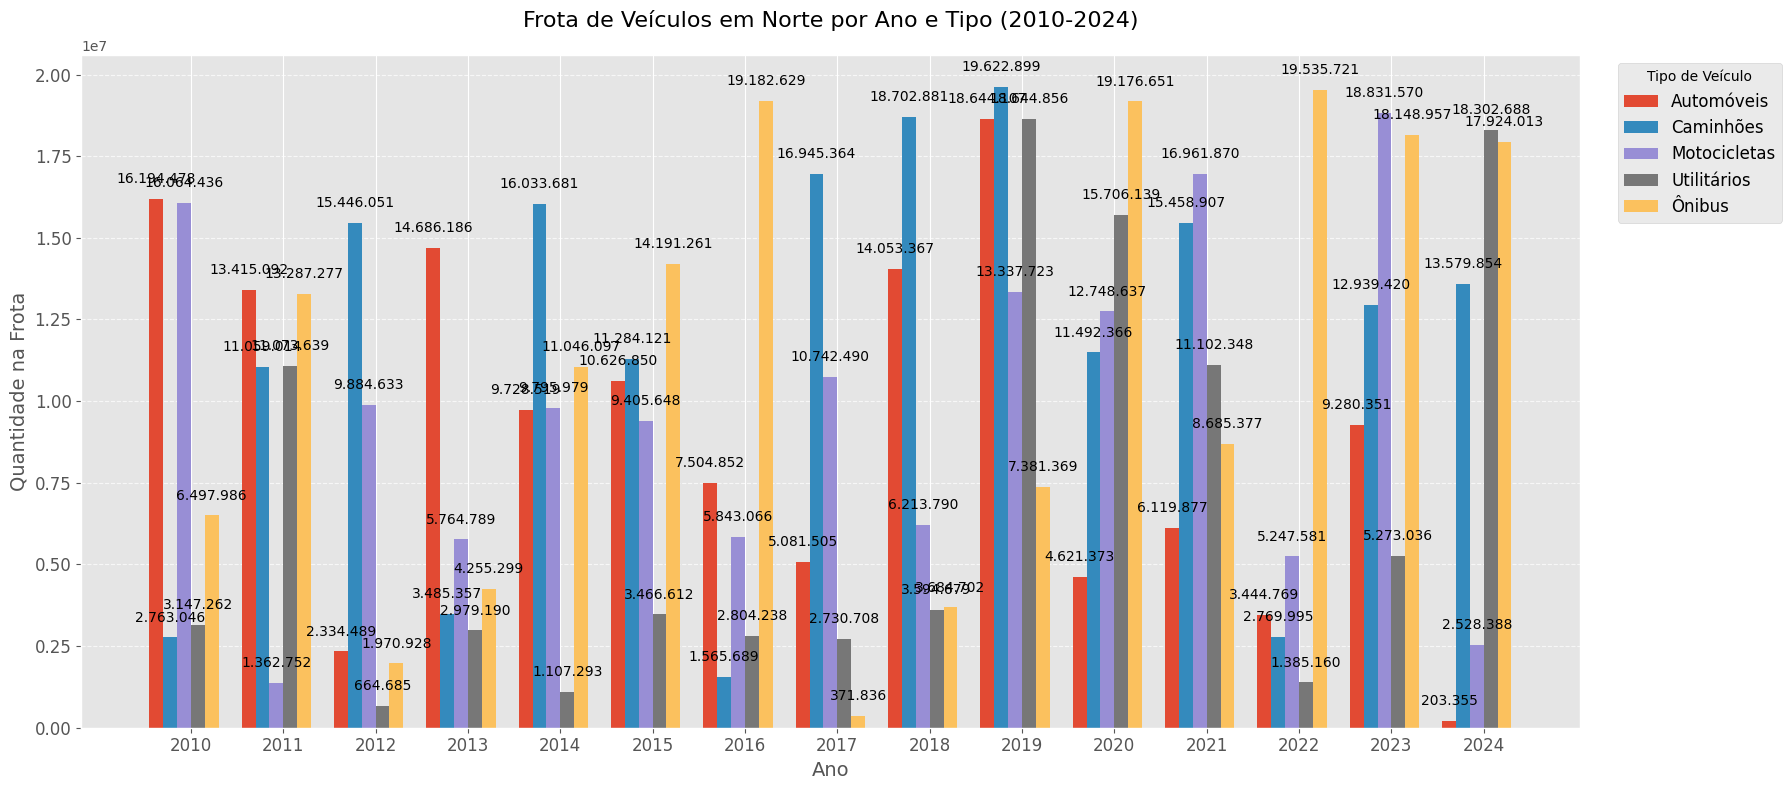

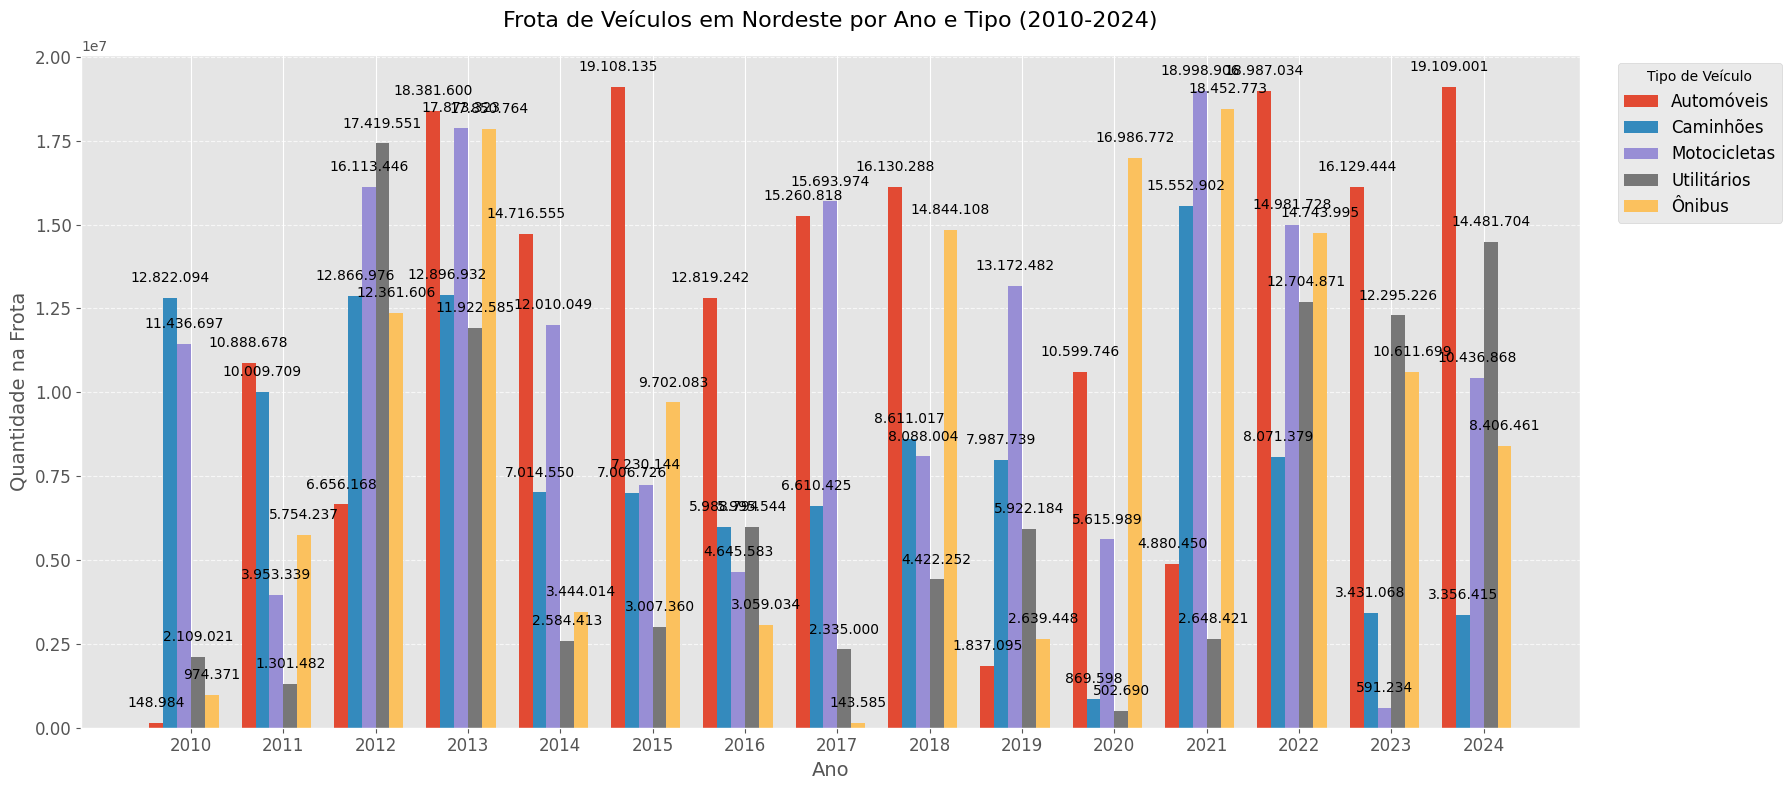

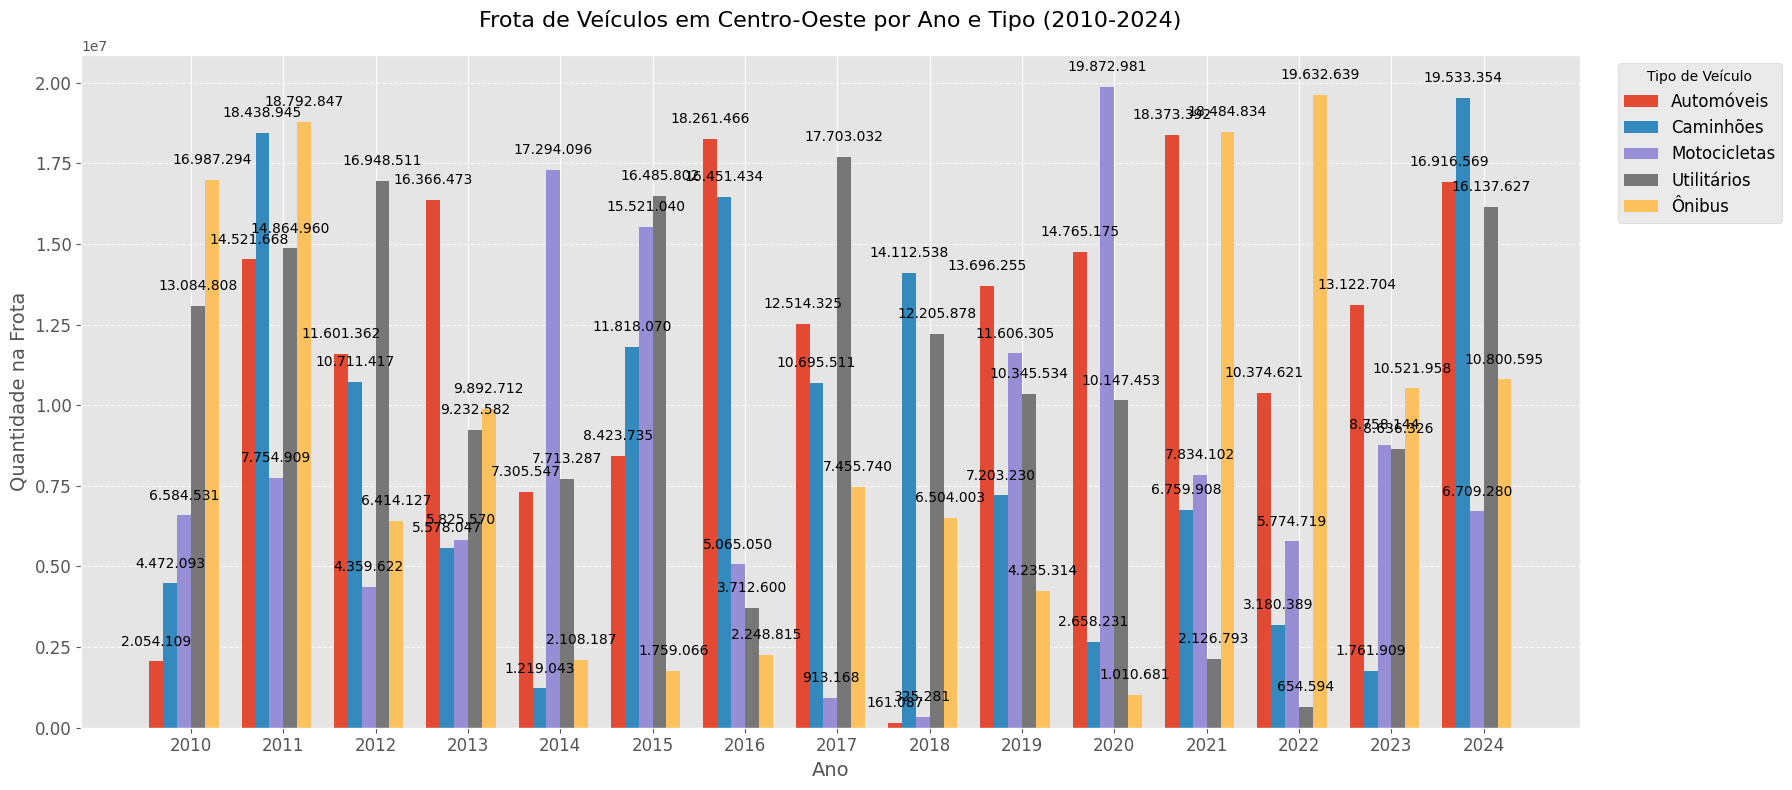

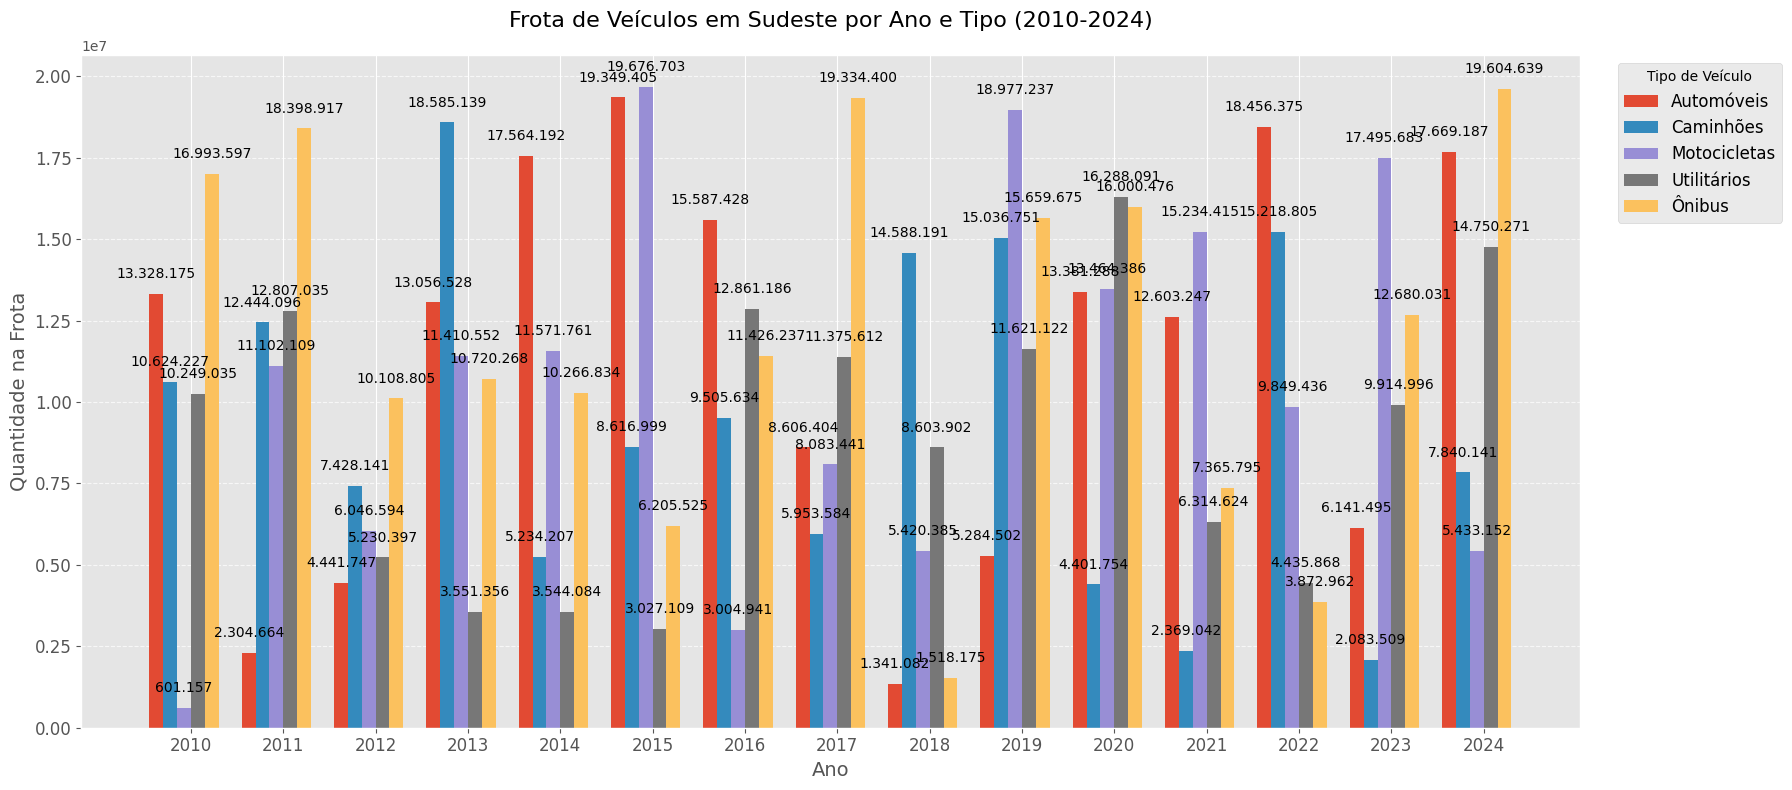

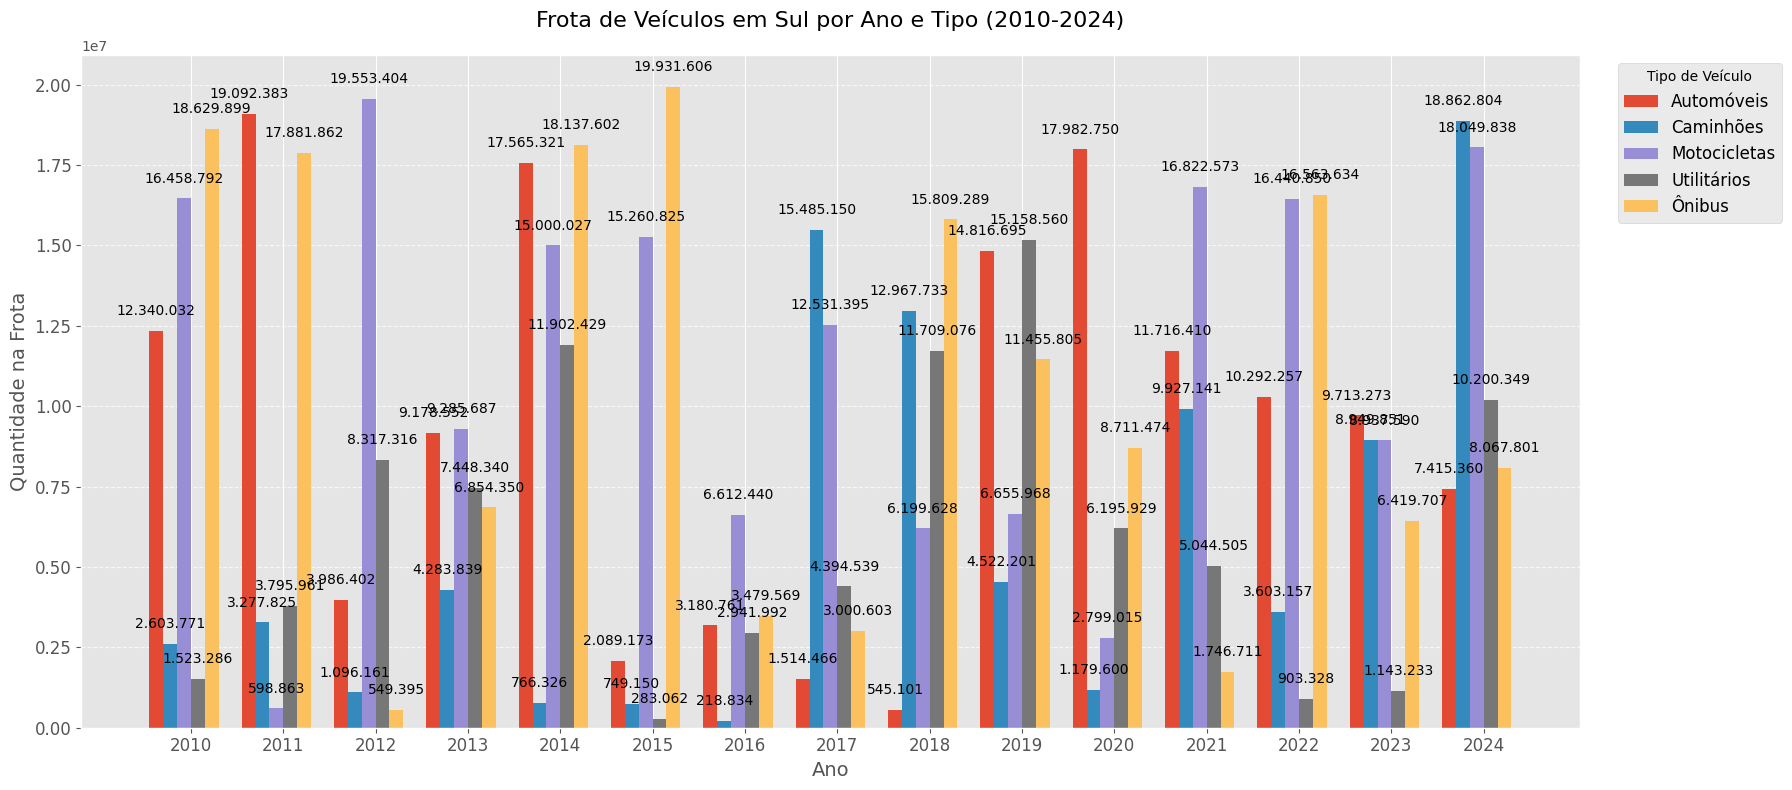

In [ ]:
pd.set_option('display.float_format', '{:,.0f}'.format)
plt.style.use('ggplot')

def formatar_numero(x):
    return f"{x:,.0f}".replace(",", ".")


df = pd.read_csv('frota2010a2024.csv', sep=';', encoding='utf-8', thousands='.', dtype={'Quantidade na Frota': 'int64'})
df.columns = [col.strip() for col in df.columns]

regioes = df['Região'].unique()

for regiao in regioes:
    dados_regiao = df[df['Região'] == regiao]
    pivot_table = dados_regiao.pivot_table(index='Ano', columns='Tipo de Veículo',
                                           values='Quantidade na Frota', aggfunc='sum')

    plt.figure(figsize=(18, 8))
    largura_barra = 0.15
    anos = pivot_table.index
    tipos_veiculos = pivot_table.columns
    num_tipos = len(tipos_veiculos)

    for i, tipo in enumerate(tipos_veiculos):
        posicoes = [x + (i * largura_barra) - (num_tipos * largura_barra / 2) for x in range(len(anos))]
        plt.bar(posicoes, pivot_table[tipo], width=largura_barra, label=tipo)

    plt.title(f'Frota de Veículos em {regiao} por Ano e Tipo (2010-2024)', fontsize=16, pad=20)
    plt.xlabel('Ano', fontsize=14)
    plt.ylabel('Quantidade na Frota', fontsize=14)
    plt.xticks(range(len(anos)), anos, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for i, tipo in enumerate(tipos_veiculos):
        posicoes = [x + (i * largura_barra) - (num_tipos * largura_barra / 2) for x in range(len(anos))]
        for j, valor in enumerate(pivot_table[tipo]):
            plt.text(posicoes[j], valor + (pivot_table.values.max() * 0.02),
                     formatar_numero(valor), ha='center', va='bottom', fontsize=10)

    plt.legend(title='Tipo de Veículo', fontsize=12, bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


# Análise de região por ano

A evolução da frota de veículos nas regiões Norte, Nordeste e Centro-Oeste do Brasil entre 2011 e 2024 revela importantes mudanças no perfil de mobilidade e também reflete impactos econômicos e sociais ao longo desse período. A região Norte, em especial, apresentou uma grande oscilação nas categorias de ônibus, automóveis e utilitários. Entre 2011 e 2012, esses três tipos de veículos sofreram uma queda brusca, sugerindo um momento de retração econômica ou mudanças nas políticas de transporte. Em contrapartida, as motocicletas ganharam espaço, registrando um aumento expressivo, o que pode estar relacionado à busca por alternativas mais acessíveis de locomoção.

No entanto, esse movimento foi revertido no ano seguinte: em 2013, houve redução nas frotas de motocicletas e caminhões, enquanto os demais veículos voltaram a crescer. Isso indica uma dinâmica instável, na qual diferentes segmentos reagem de forma independente a contextos variados, como incentivos fiscais, variações no consumo e prioridades de infraestrutura. Um ponto particularmente crítico ocorreu em 2017, quando a frota de ônibus no Norte caiu drasticamente de 19.182.629 para apenas 371.836 unidades. Essa queda abrupta pode refletir mudanças metodológicas de registro, políticas públicas de renovação de frota ou até desinvestimento em transporte coletivo. A partir desse ponto, os ônibus voltaram a crescer ano após ano, atingindo o maior número registrado em 2022 — exatamente quando as demais categorias apresentaram quedas.

Fenômeno semelhante foi observado na região Nordeste. A frota de ônibus também sofreu uma redução significativa em determinado momento, mas diferentemente do Norte, a recuperação começou logo no ano seguinte. Isso sugere uma resposta regional diferenciada, talvez impulsionada por investimentos locais em transporte público ou por reorganizações nas empresas de mobilidade urbana. A resiliência da frota de ônibus no Nordeste pode indicar maior prioridade dada ao transporte coletivo em relação a outras regiões.

Já na região Centro-Oeste, os automóveis enfrentaram uma queda em 2018, que foi seguida por três anos consecutivos de crescimento, atingindo o ápice de 18 milhões de unidades. Contudo, em 2022, houve nova retração, com sinais de recuperação já visíveis nos dados mais recentes. Os ônibus, por sua vez, foram duramente impactados durante o ano de 2020, coincidentemente com a pandemia de COVID-19, o que contribuiu para uma das quedas mais bruscas da série histórica, levando à menor frota desde 2010. Esse comportamento evidencia os efeitos profundos da crise sanitária no setor de transporte público.

De forma geral, os dados analisados revelam que a frota de veículos no Brasil é fortemente influenciada por eventos econômicos, sociais e estruturais. As oscilações entre os diferentes tipos de veículos indicam que políticas regionais, mudanças nos hábitos da população e até eventos globais, como pandemias, têm capacidade de alterar significativamente a paisagem da mobilidade nas diferentes regiões do país.

Na região Sudeste, as oscilações também foram marcantes ao longo do período analisado. Em 2018, tanto a frota de ônibus quanto de automóveis atingiu o nível mais baixo já registrado desde 2010, sinalizando uma possível desaceleração econômica regional ou mudanças nas políticas de mobilidade urbana. No entanto, em 2019 e 2020, houve uma recuperação expressiva dessas frotas, refletindo uma retomada na atividade econômica e nos investimentos em transporte. Essa retomada, contudo, foi interrompida em 2022, quando uma nova queda foi registrada. A partir de então, os números voltaram a crescer nos dois anos seguintes, demonstrando resiliência e adaptação do setor às mudanças conjunturais. No que diz respeito às motocicletas, a região apresentou elevações relevantes em 2015, 2019, 2021 e 2023, possivelmente impulsionadas pelo crescimento de serviços de entrega, deslocamentos individuais e mudanças de hábitos no pós-pandemia.

Já no Sul do Brasil, o cenário também é repleto de variações interessantes. Em 2024, caminhões e motocicletas apresentaram crescimento expressivo, enquanto os automóveis registraram uma leve retração. Essa dinâmica pode refletir tanto mudanças no perfil logístico e comercial da região quanto transformações nos padrões de consumo e mobilidade. Entre os anos de 2012, 2015, 2017 e, principalmente, 2018, os automóveis mantiveram-se em patamares bastante reduzidos, indicando momentos de baixa demanda ou dificuldades econômicas mais acentuadas. O auge da frota de motocicletas ocorreu em 2012, ultrapassando a marca de 19 milhões de unidades, enquanto o pico da frota de ônibus foi registrado em 2015, também com mais de 19 milhões, revelando um protagonismo relevante desses modais nesse período. Durante a pandemia de 2020, os automóveis surpreendentemente apresentaram alta, o que pode ser explicado pela busca por transporte privado em detrimento do coletivo, como forma de evitar contágio.

# Avaliação dos último ano (maio de 2024 à maio de 2025)


In [ ]:
MESES_PT = {
    'janeiro': 1, 'fevereiro': 2, 'marco': 3, 'abril': 4, 'maio': 5, 'junho': 6,
    'julho': 7, 'agosto': 8, 'setembro': 9, 'outubro': 10, 'novembro': 11, 'dezembro': 12
}


arquivos = pd.Series(pd.io.common.os.listdir("."))
arquivos = arquivos[arquivos.str.endswith(".xlsx")].tolist()
arquivos_info = []
for nome in arquivos:
    nome_lower = nome.lower()
    mes_num = 999
    ano_num = 9999
    ref = "desconhecido"
    for mes, m_num in MESES_PT.items():
        if mes in nome_lower:
            ano = nome_lower.split('.')[0][-4:]
            if ano.isdigit():
                mes_num = m_num
                ano_num = int(ano)
                ref = f"{mes}/{ano}"
                break
    arquivos_info.append((nome, mes_num, ano_num, ref))

df_arquivos = pd.DataFrame(arquivos_info, columns=["arquivo", "mes_num", "ano_num", "referência"])
df_arquivos = df_arquivos.sort_values(["ano_num", "mes_num"])
arquivos_ordenados = df_arquivos[["arquivo", "referência", "mes_num", "ano_num"]].values.tolist()



In [ ]:
bases = []

for arq, ref_arq, mes_num, ano_num in arquivos_ordenados:
    try:
        df = pd.read_excel(arq, skiprows=2)
        df = df.dropna(how='all')
        df = df[~df[df.columns[0]].astype(str).str.contains("Brasil %|Tabela|Fonte", na=False, case=False)]

        df = df[~df.iloc[:, 0].astype(str).str.strip().str.upper().str.contains('OUTROS', na=False)]

        df.columns = df.columns.str.strip().str.lower().str.replace("automóvel", "carro")
        df.iloc[:, 0] = df.iloc[:, 0].astype(str).str.strip()

        for col in df.columns[1:]:
            df[col] = (
                df[col].astype(str)
                .str.replace('[.,]', '', regex=True)
                .pipe(pd.to_numeric, errors='coerce')
                .fillna(0)
                .astype(int)
            )

        nivel_map = {
            'NORTE': 'Região', 'NORDESTE': 'Região', 'SUDESTE': 'Região',
            'SUL': 'Região', 'CENTRO-OESTE': 'Região', 'BRASIL': 'Brasil'
        }

        df['nível'] = df.iloc[:, 0].str.strip().str.upper().map(nivel_map).fillna('Estado')
        df['referência'] = ref_arq
        df['mes_num'] = mes_num
        df['ano_num'] = ano_num
        df['arquivo'] = arq

        bases.append(df)
    except Exception as e:
        print(f"Erro ao processar {arq}: {str(e)}")

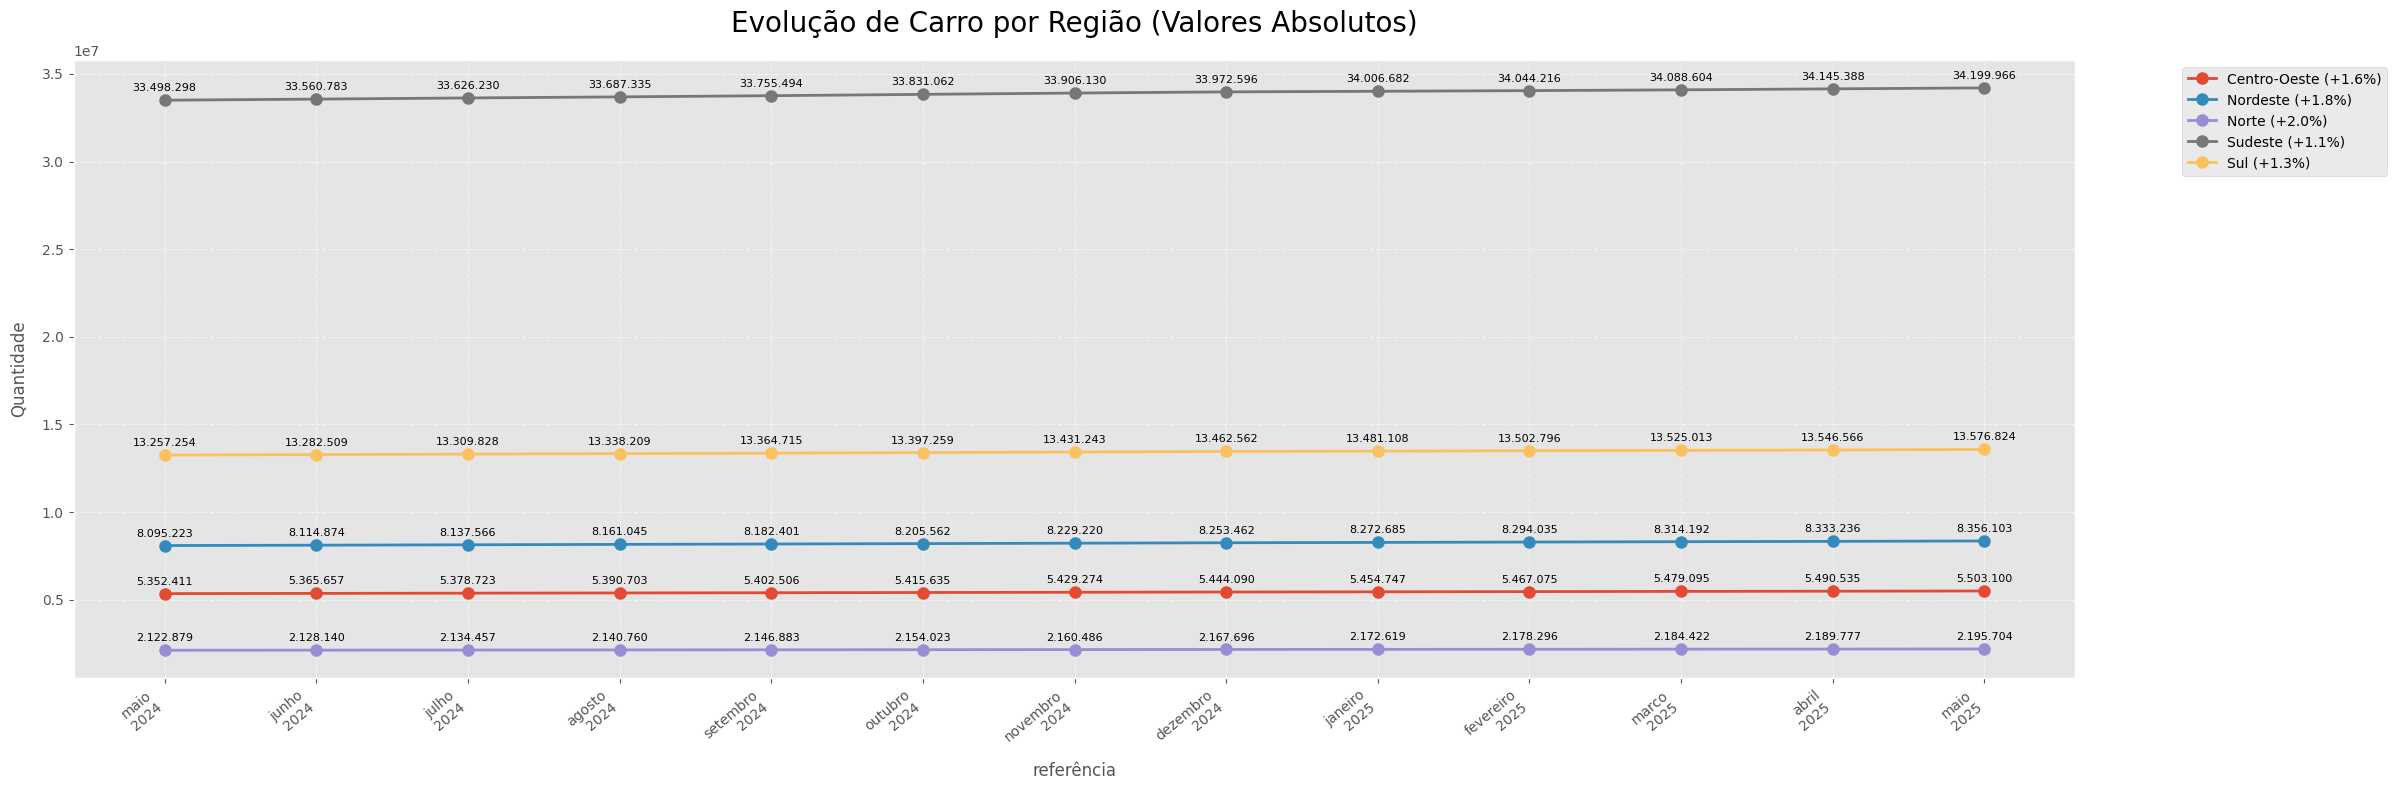

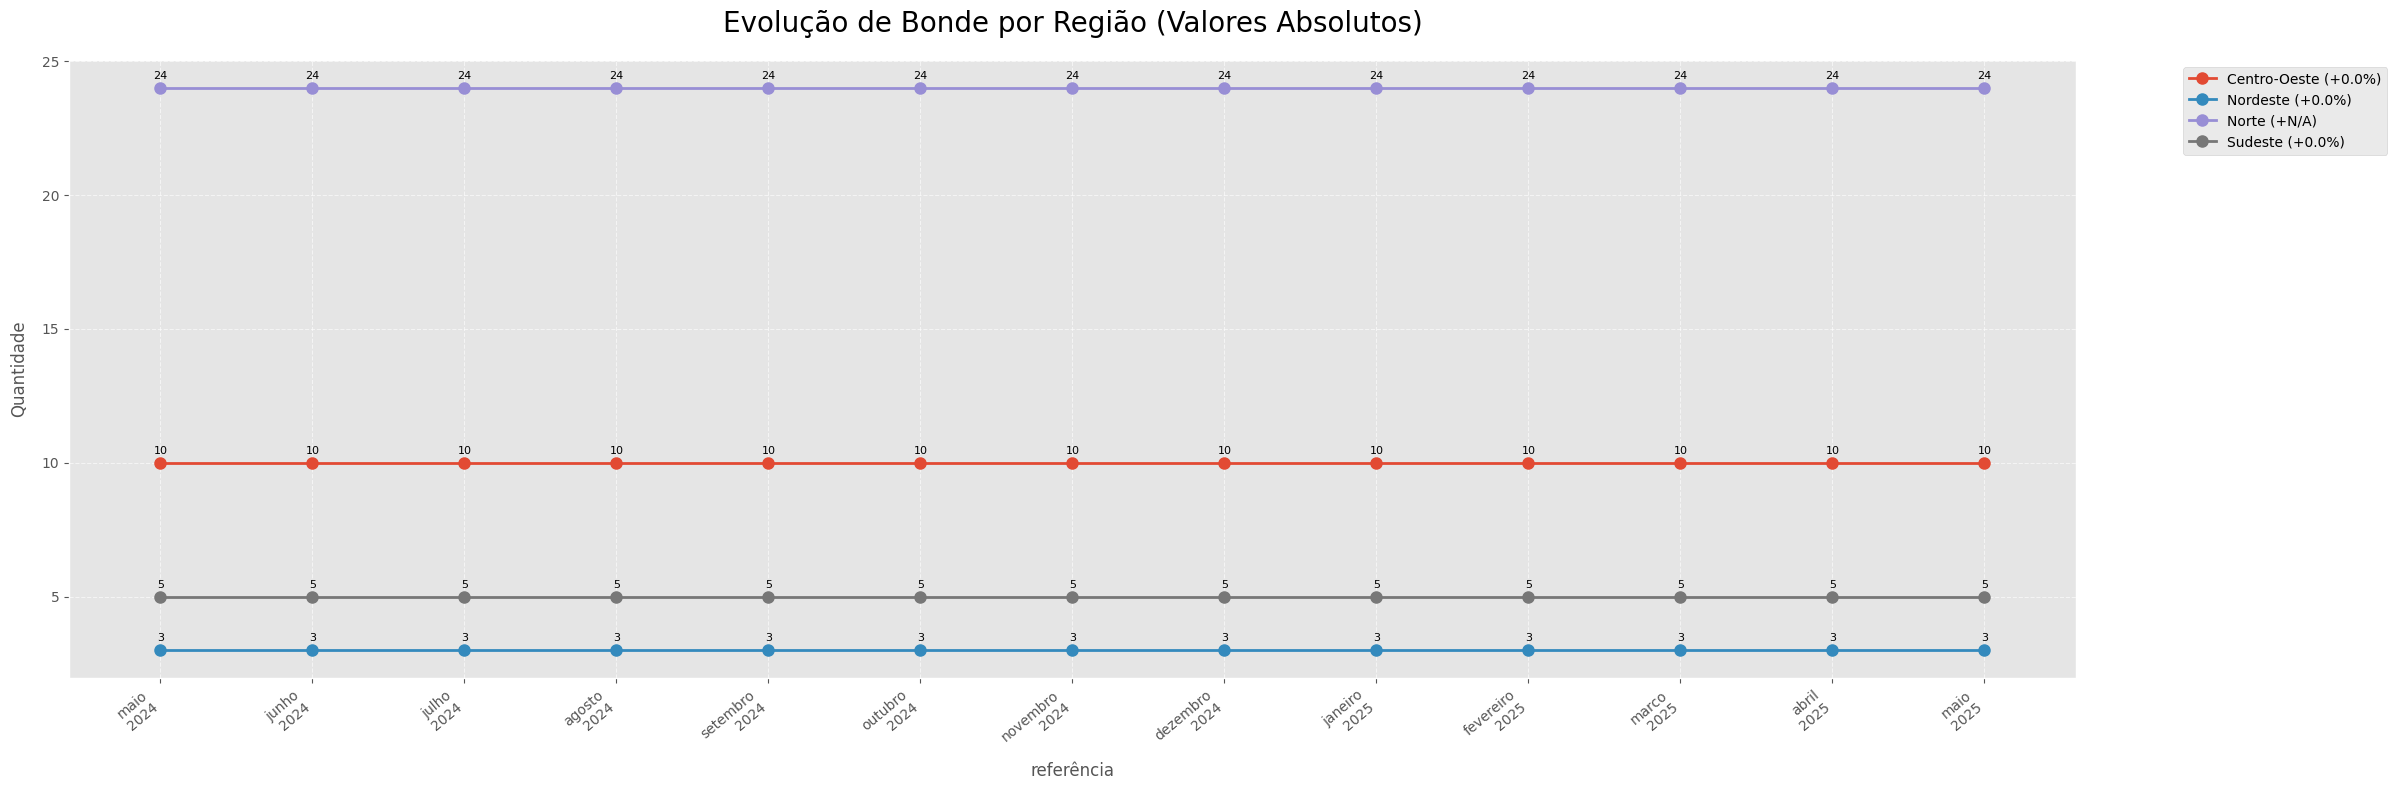

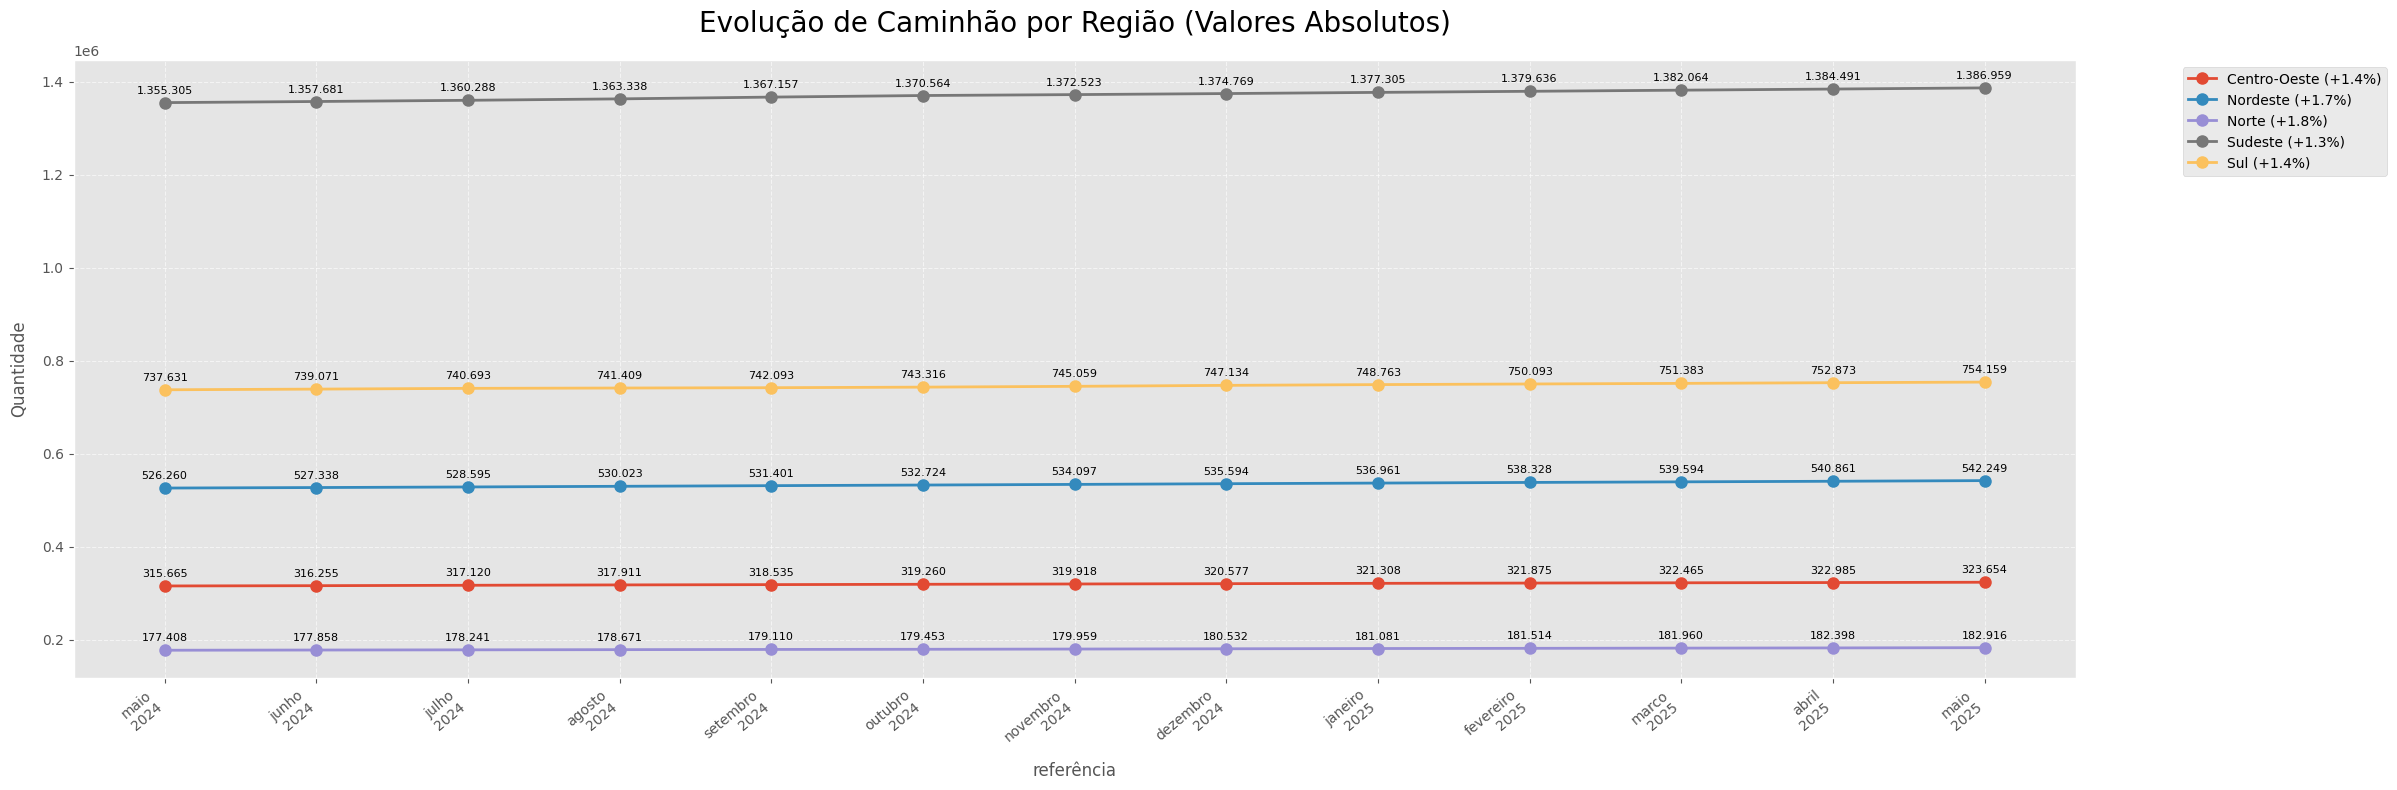

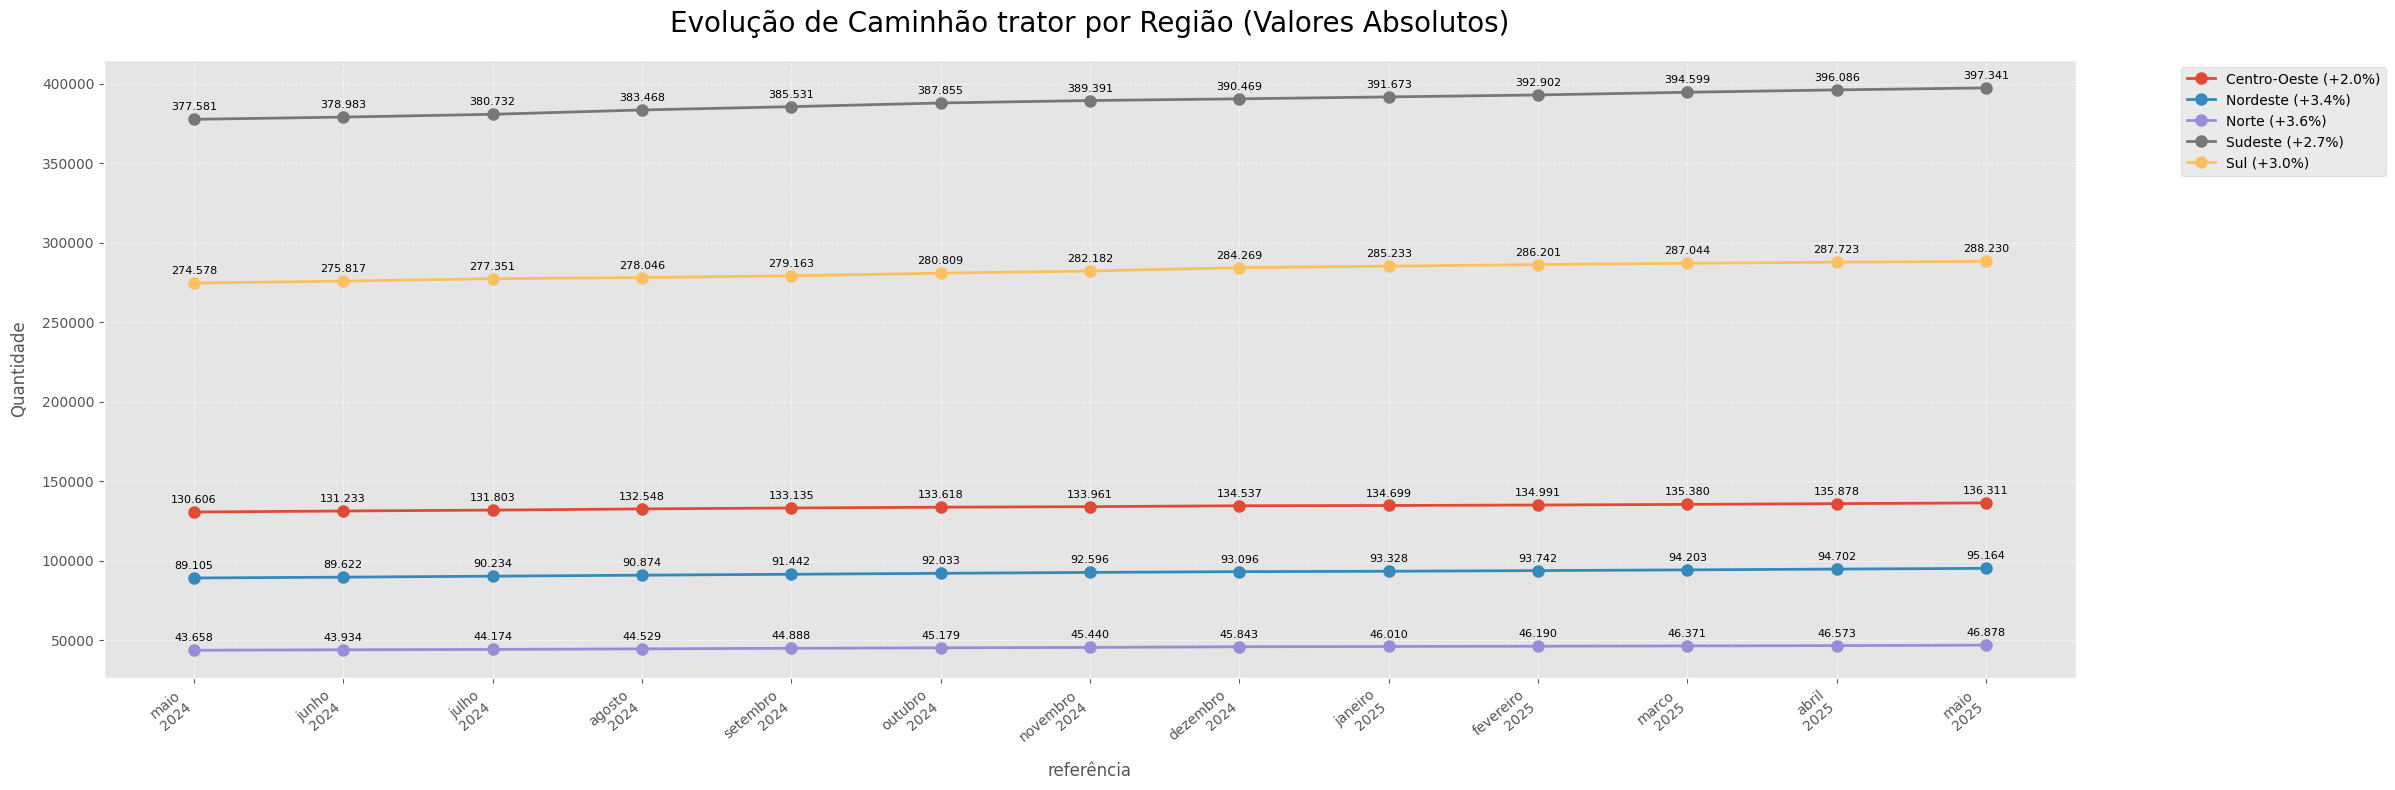

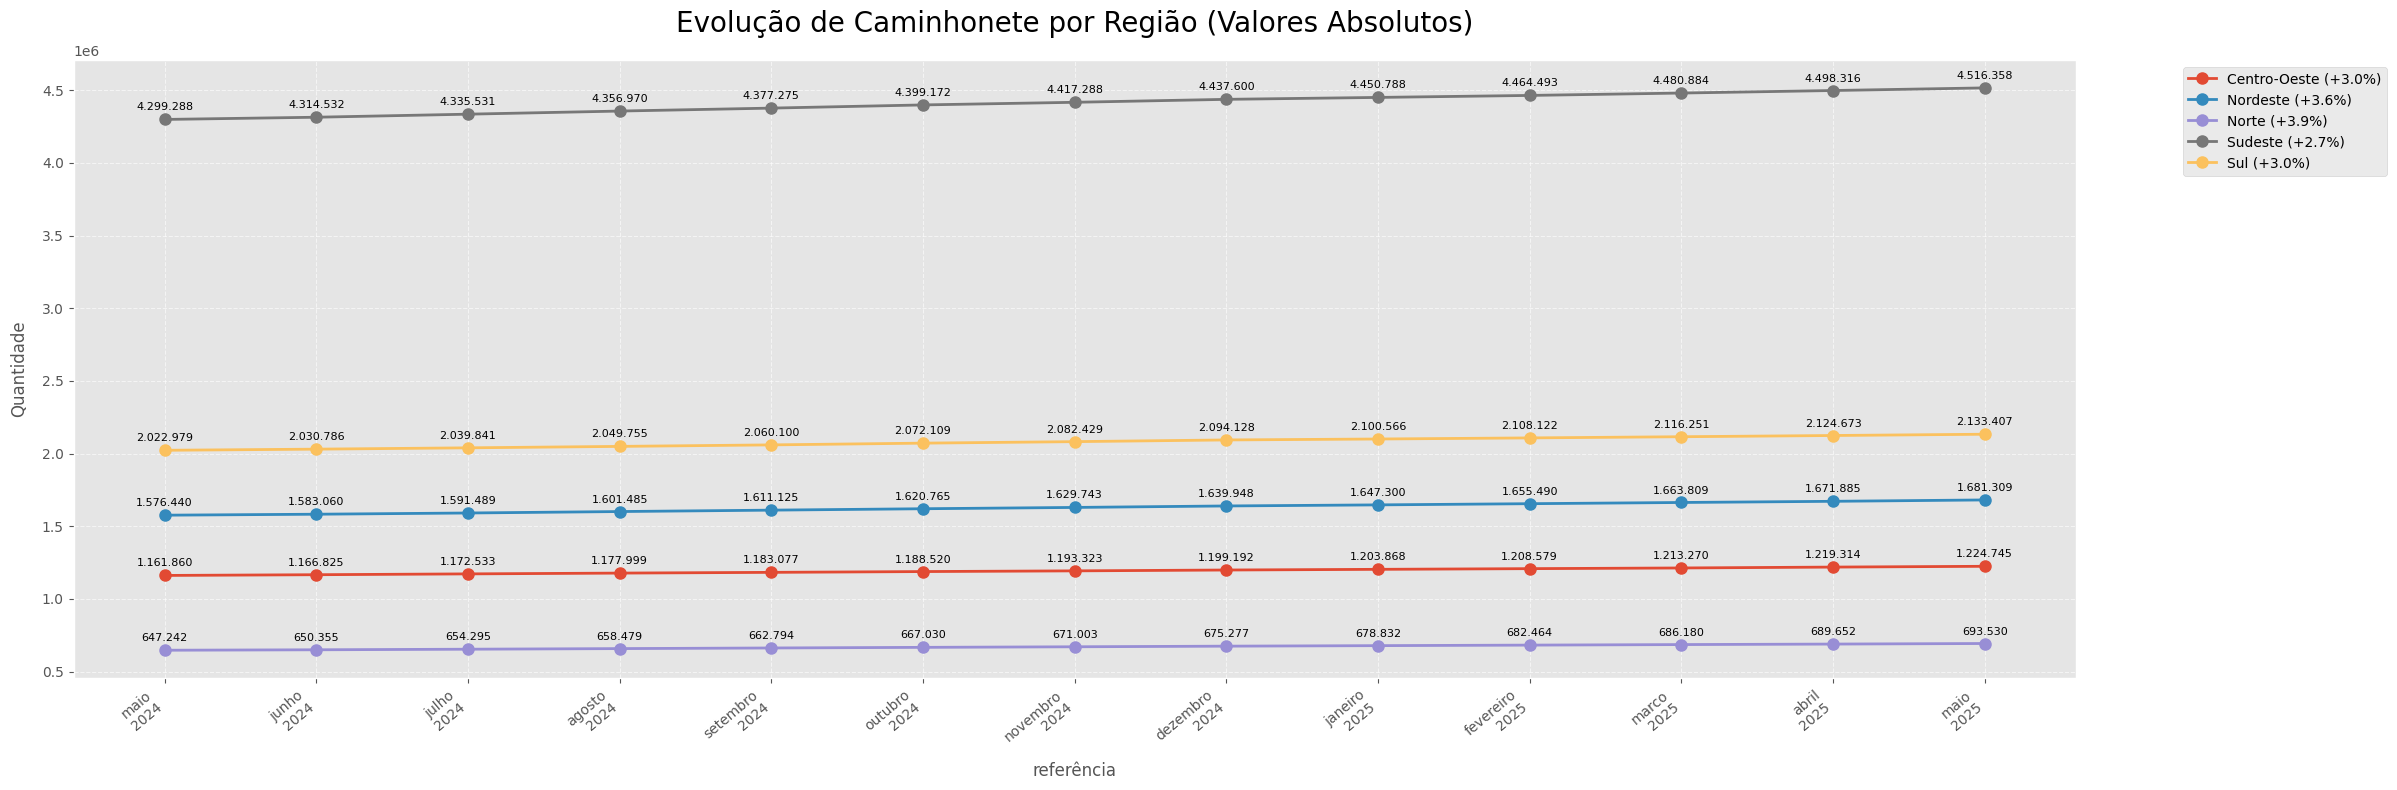

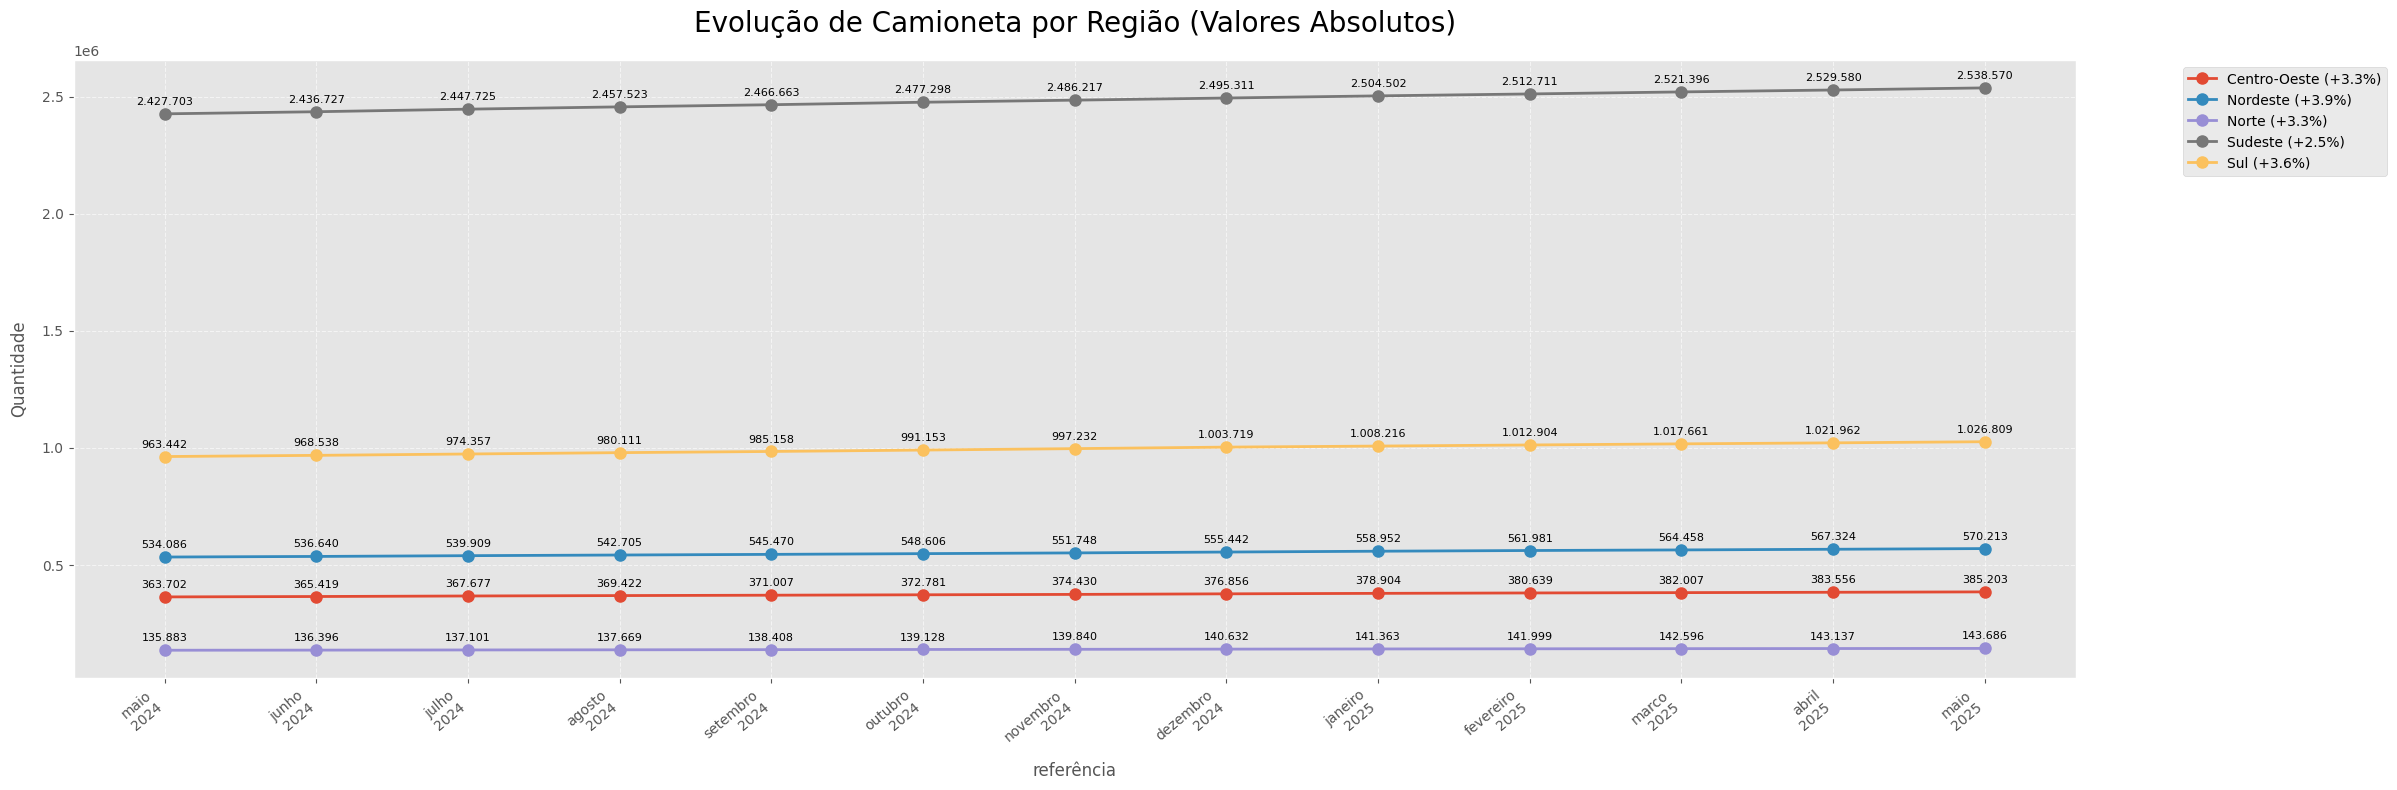

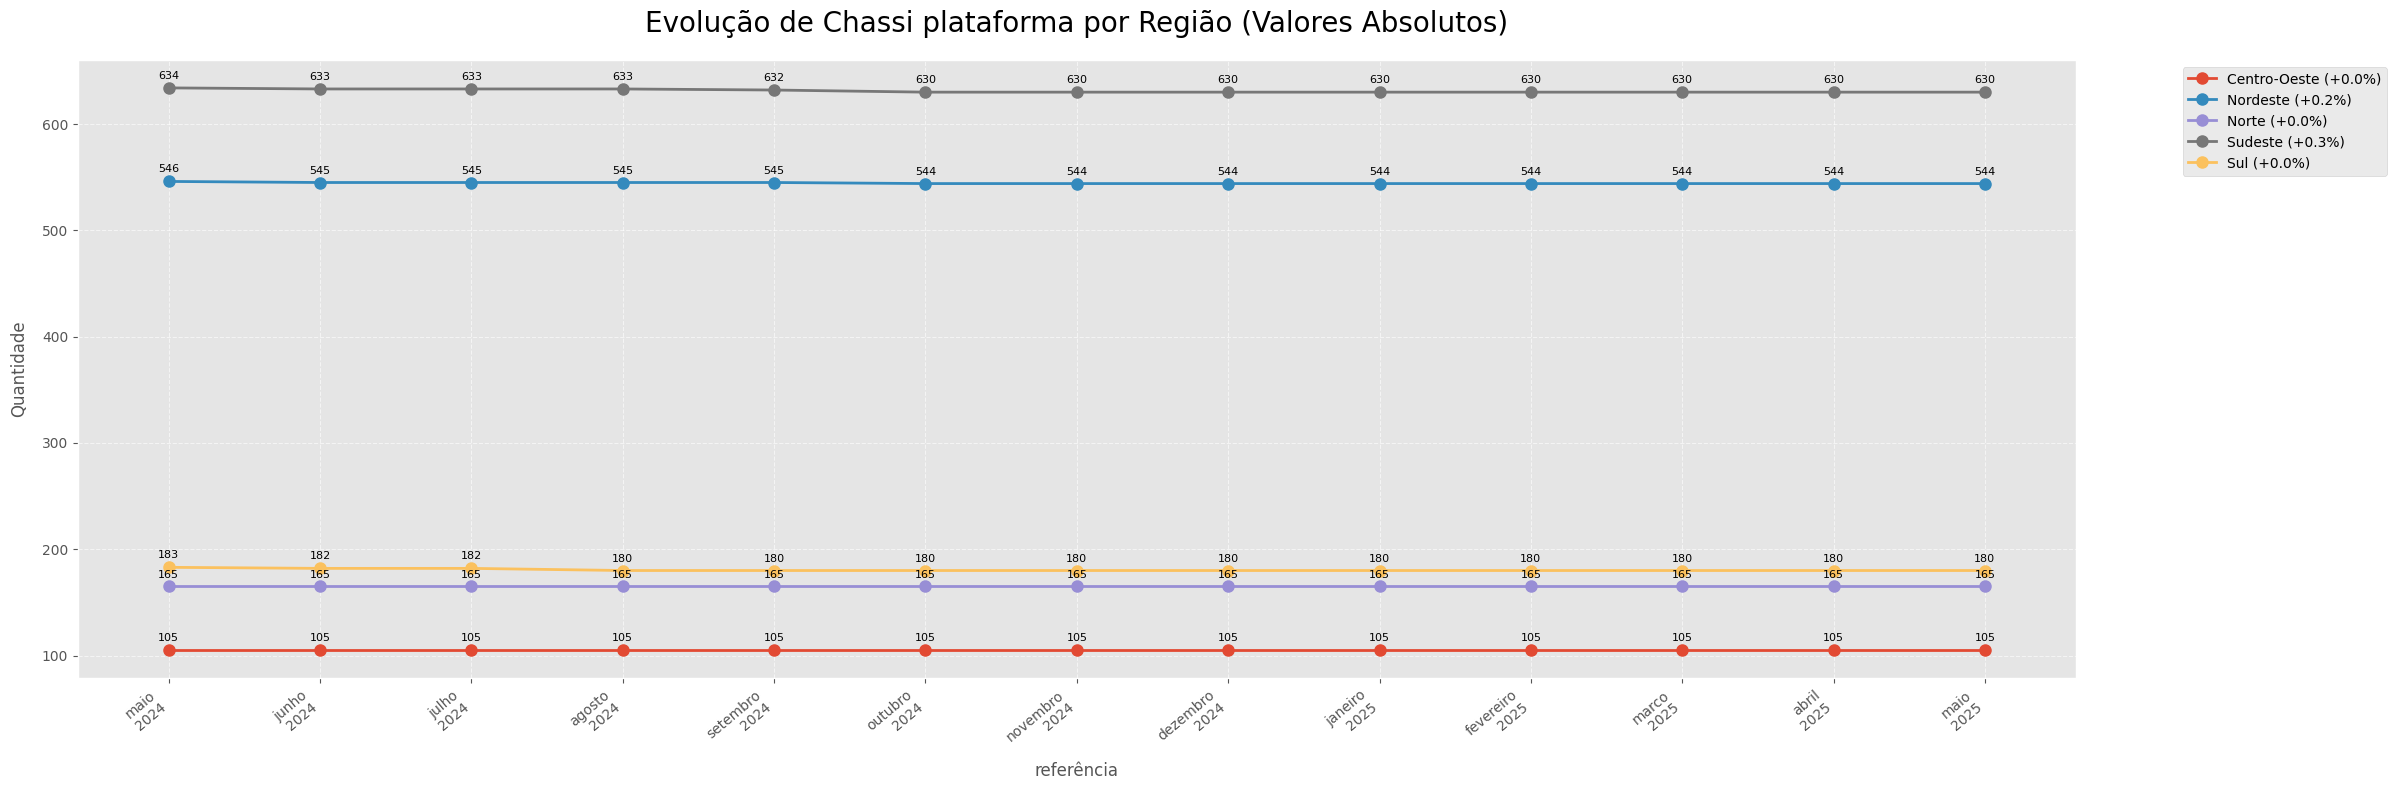

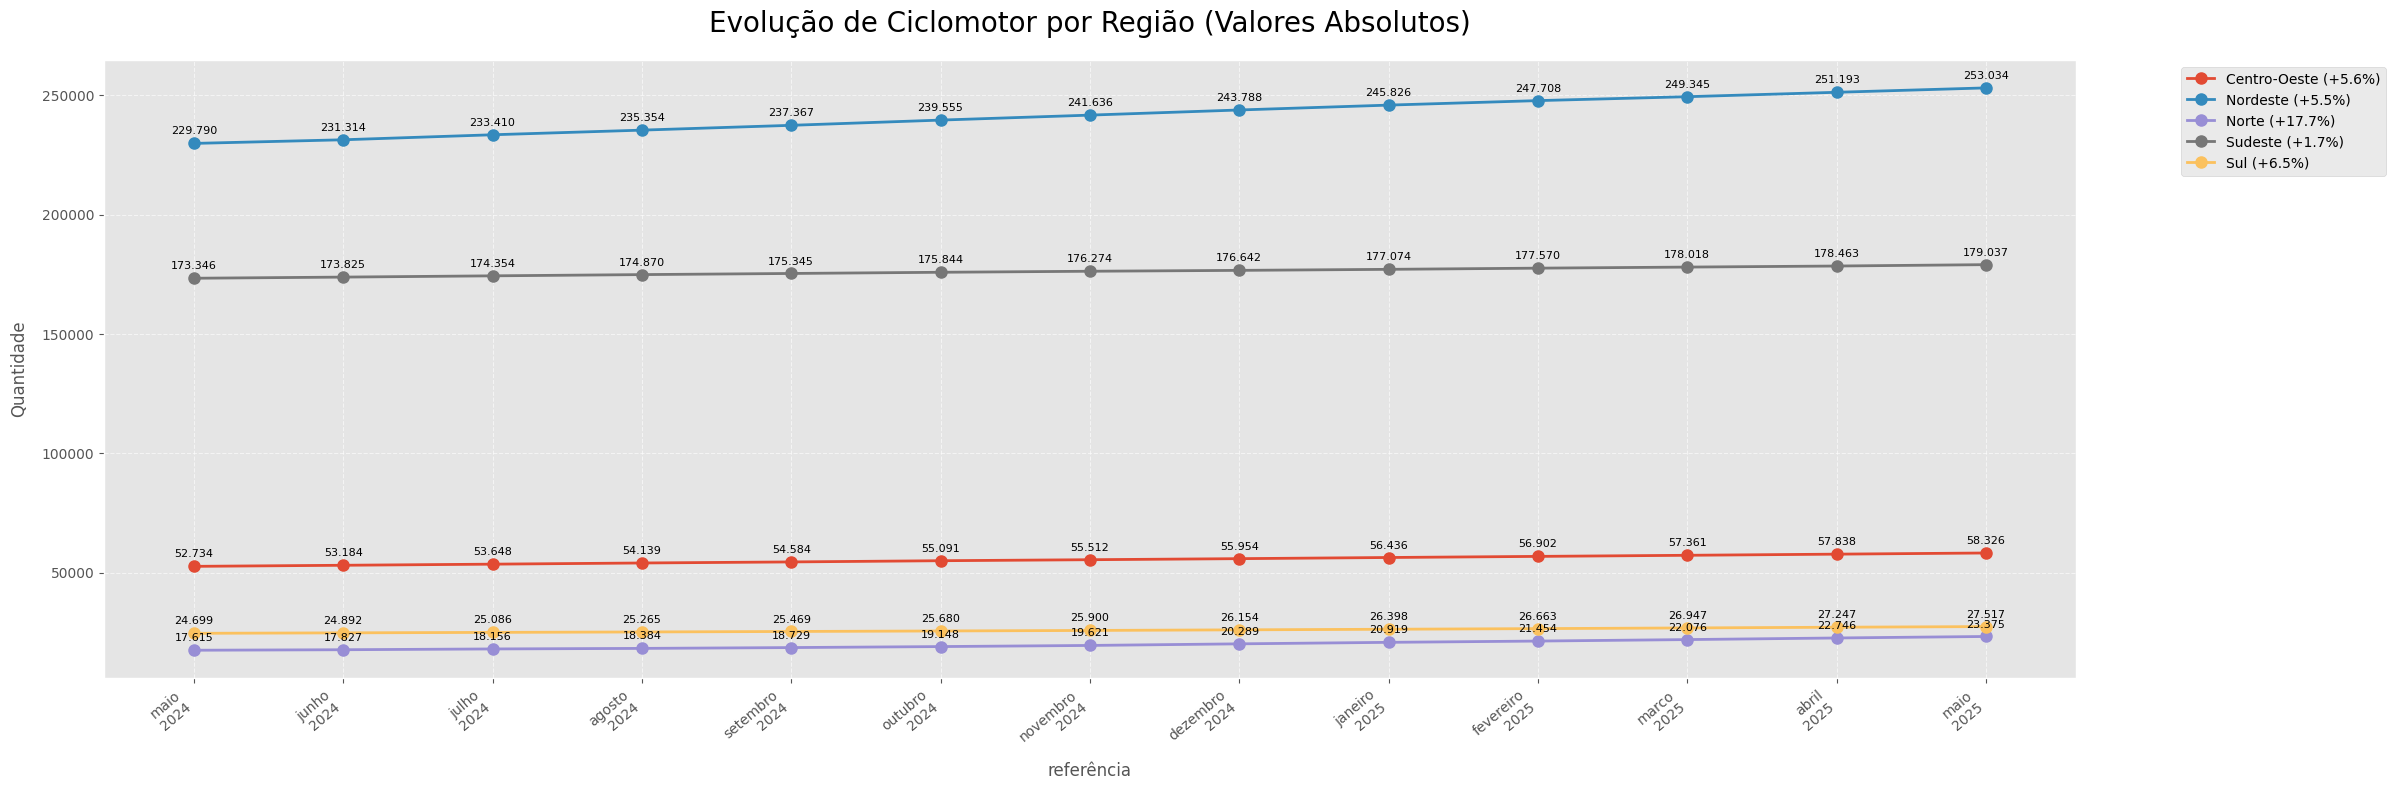

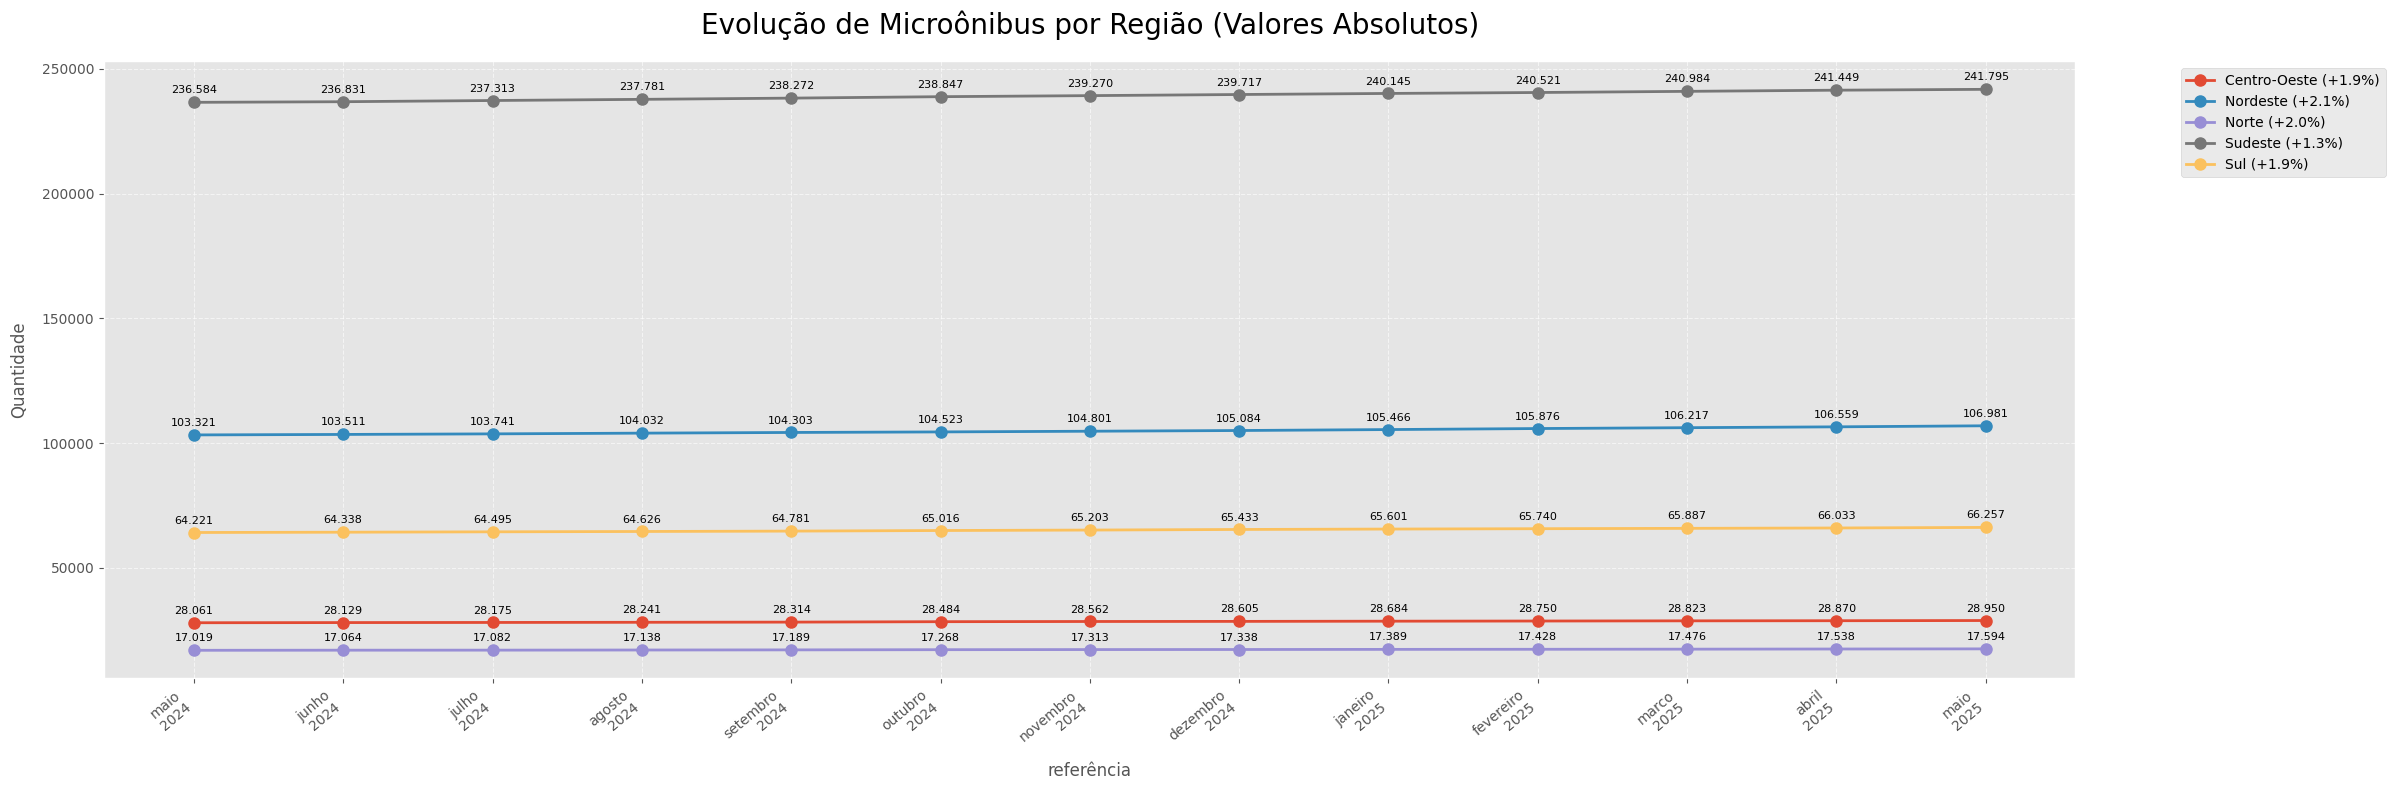

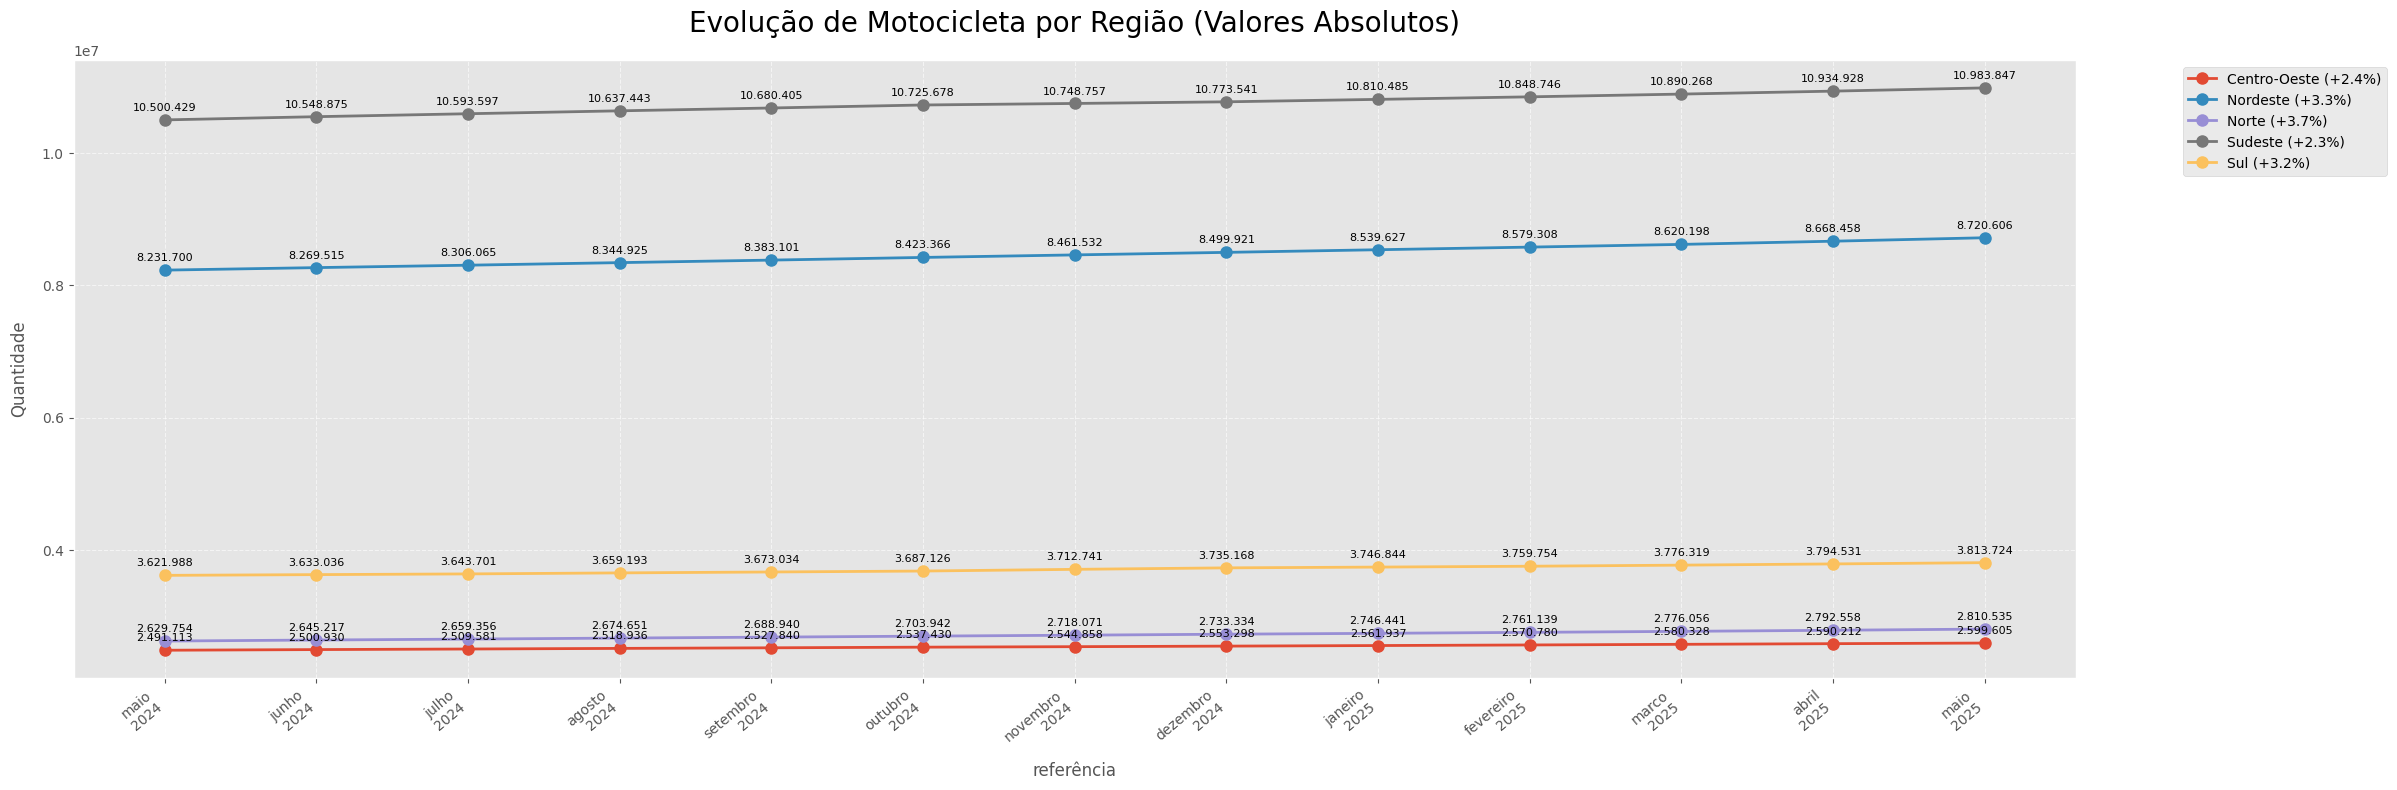

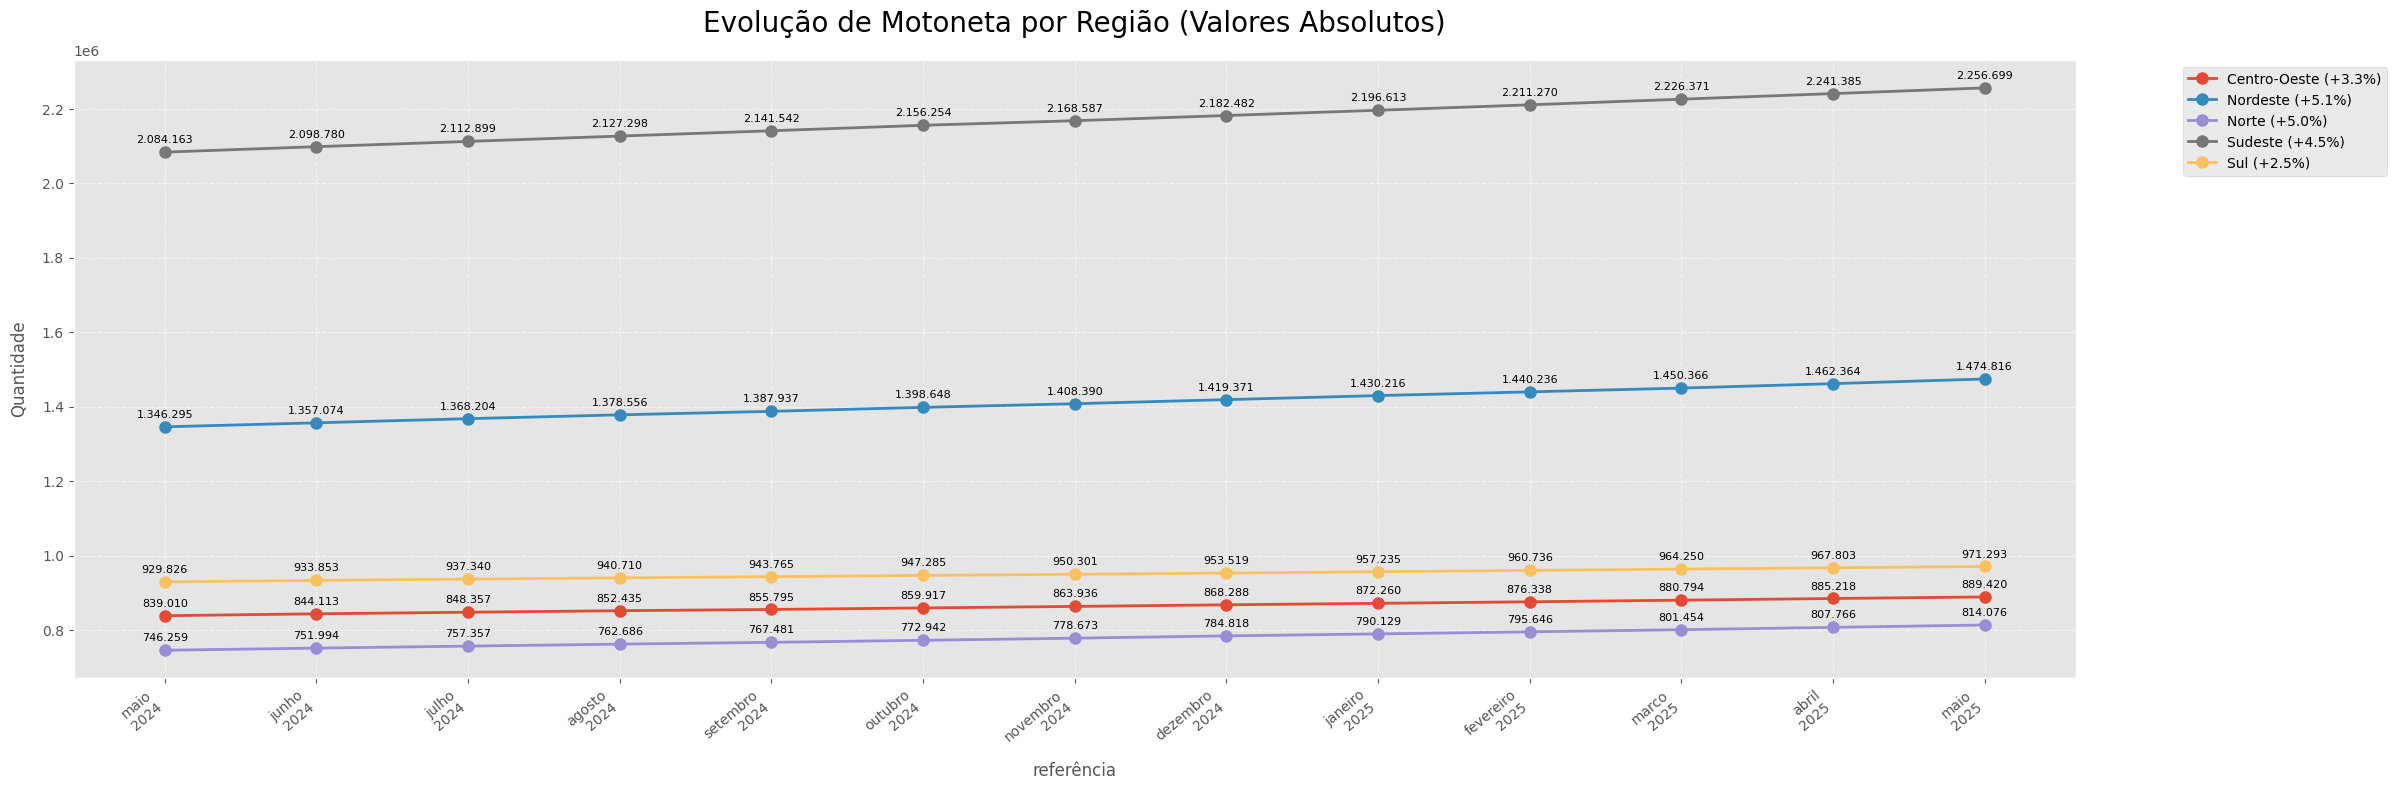

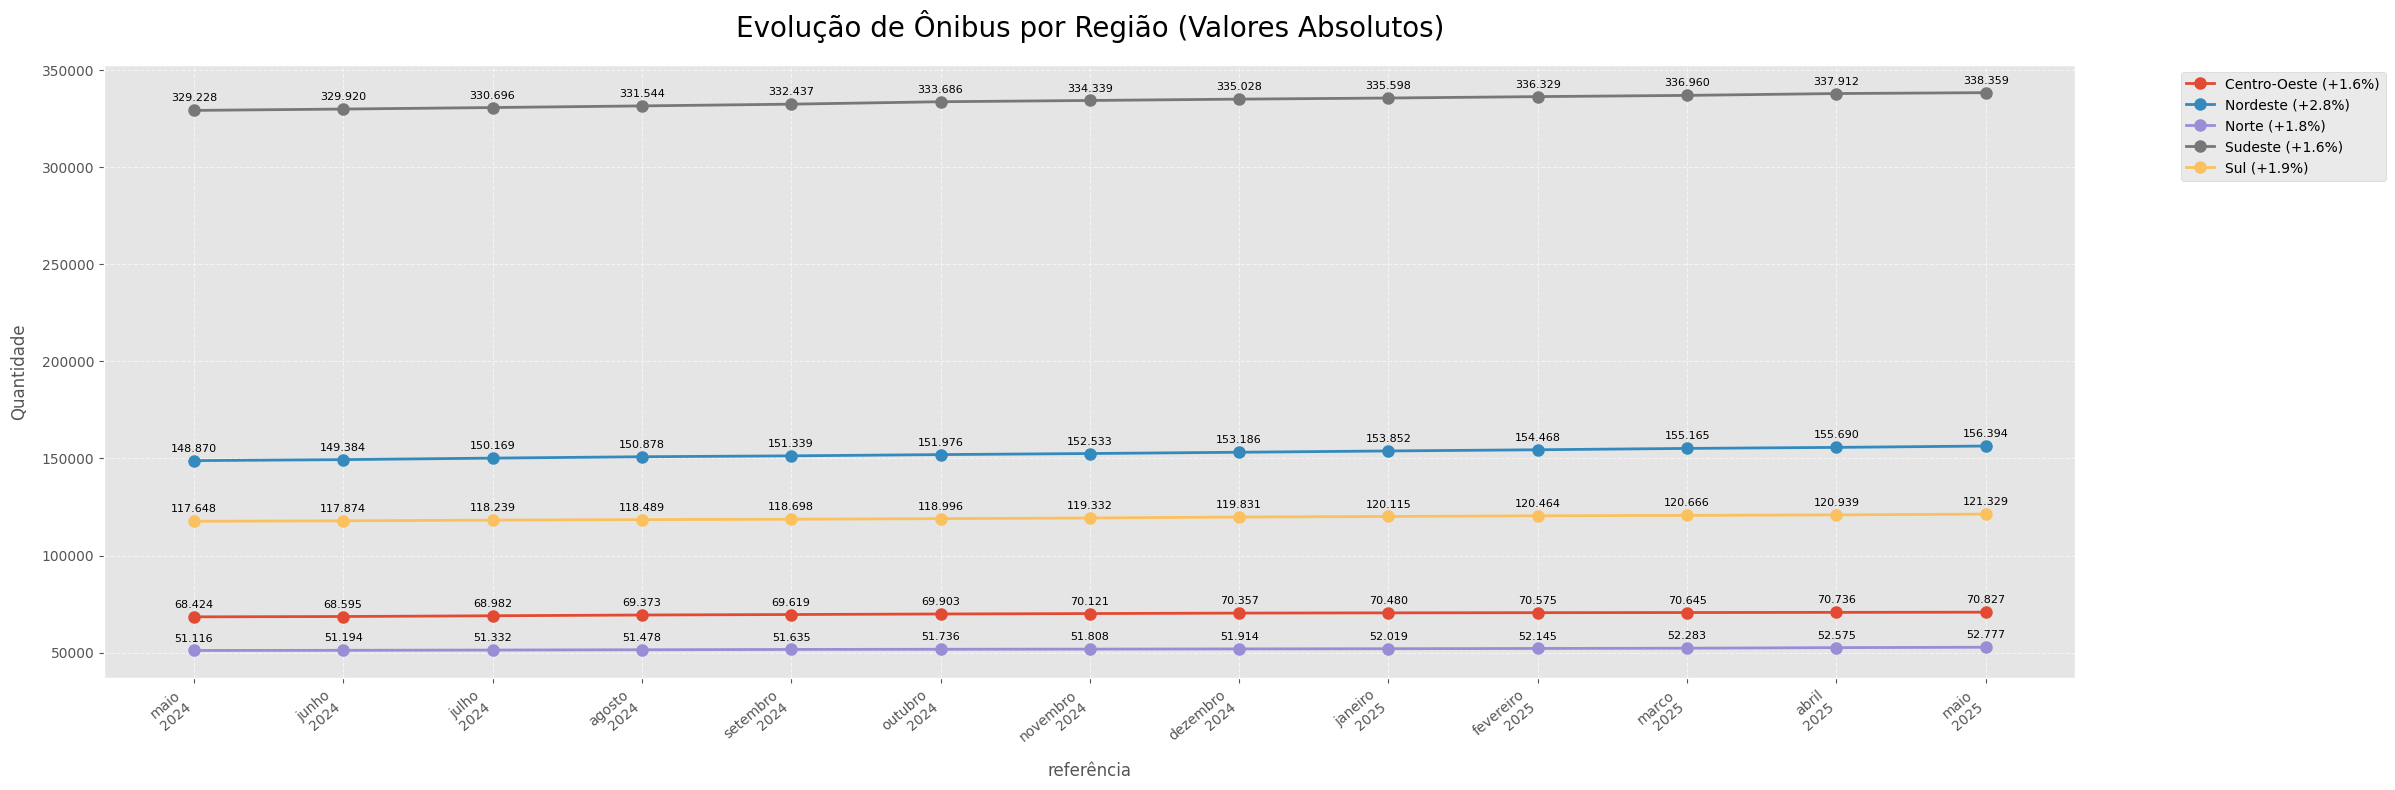

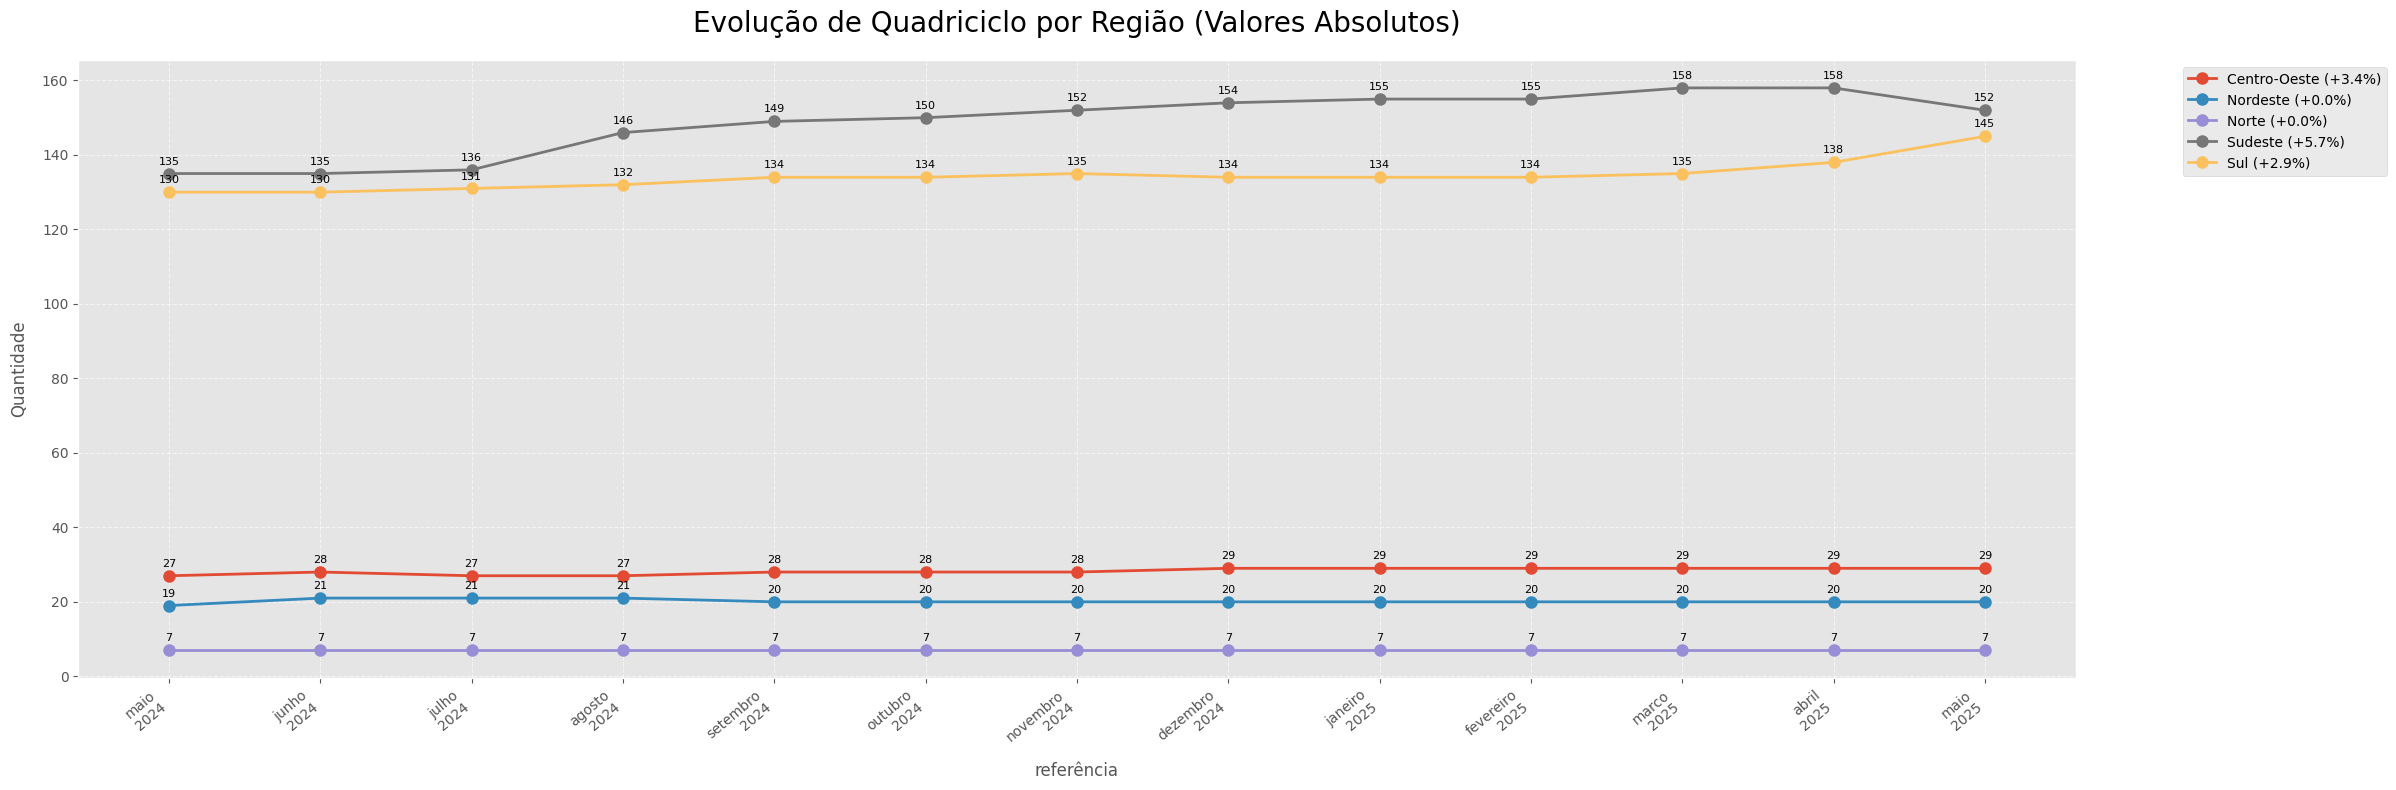

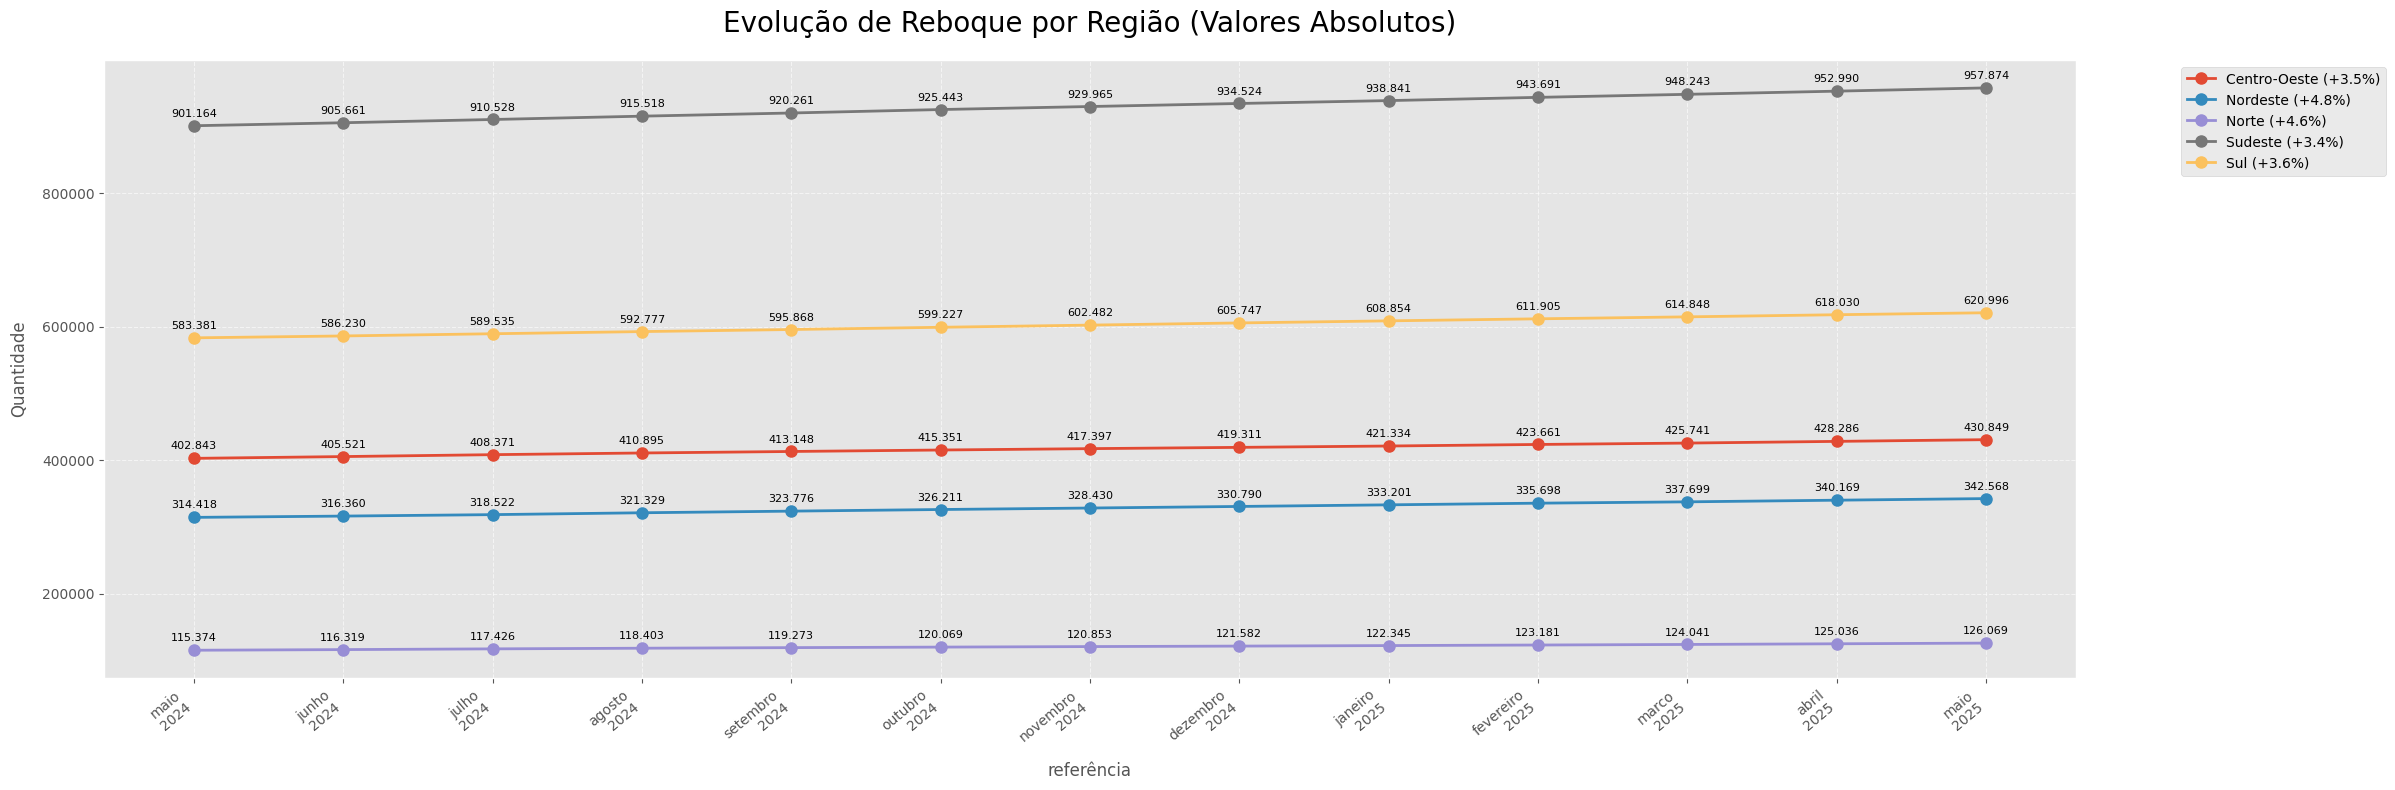

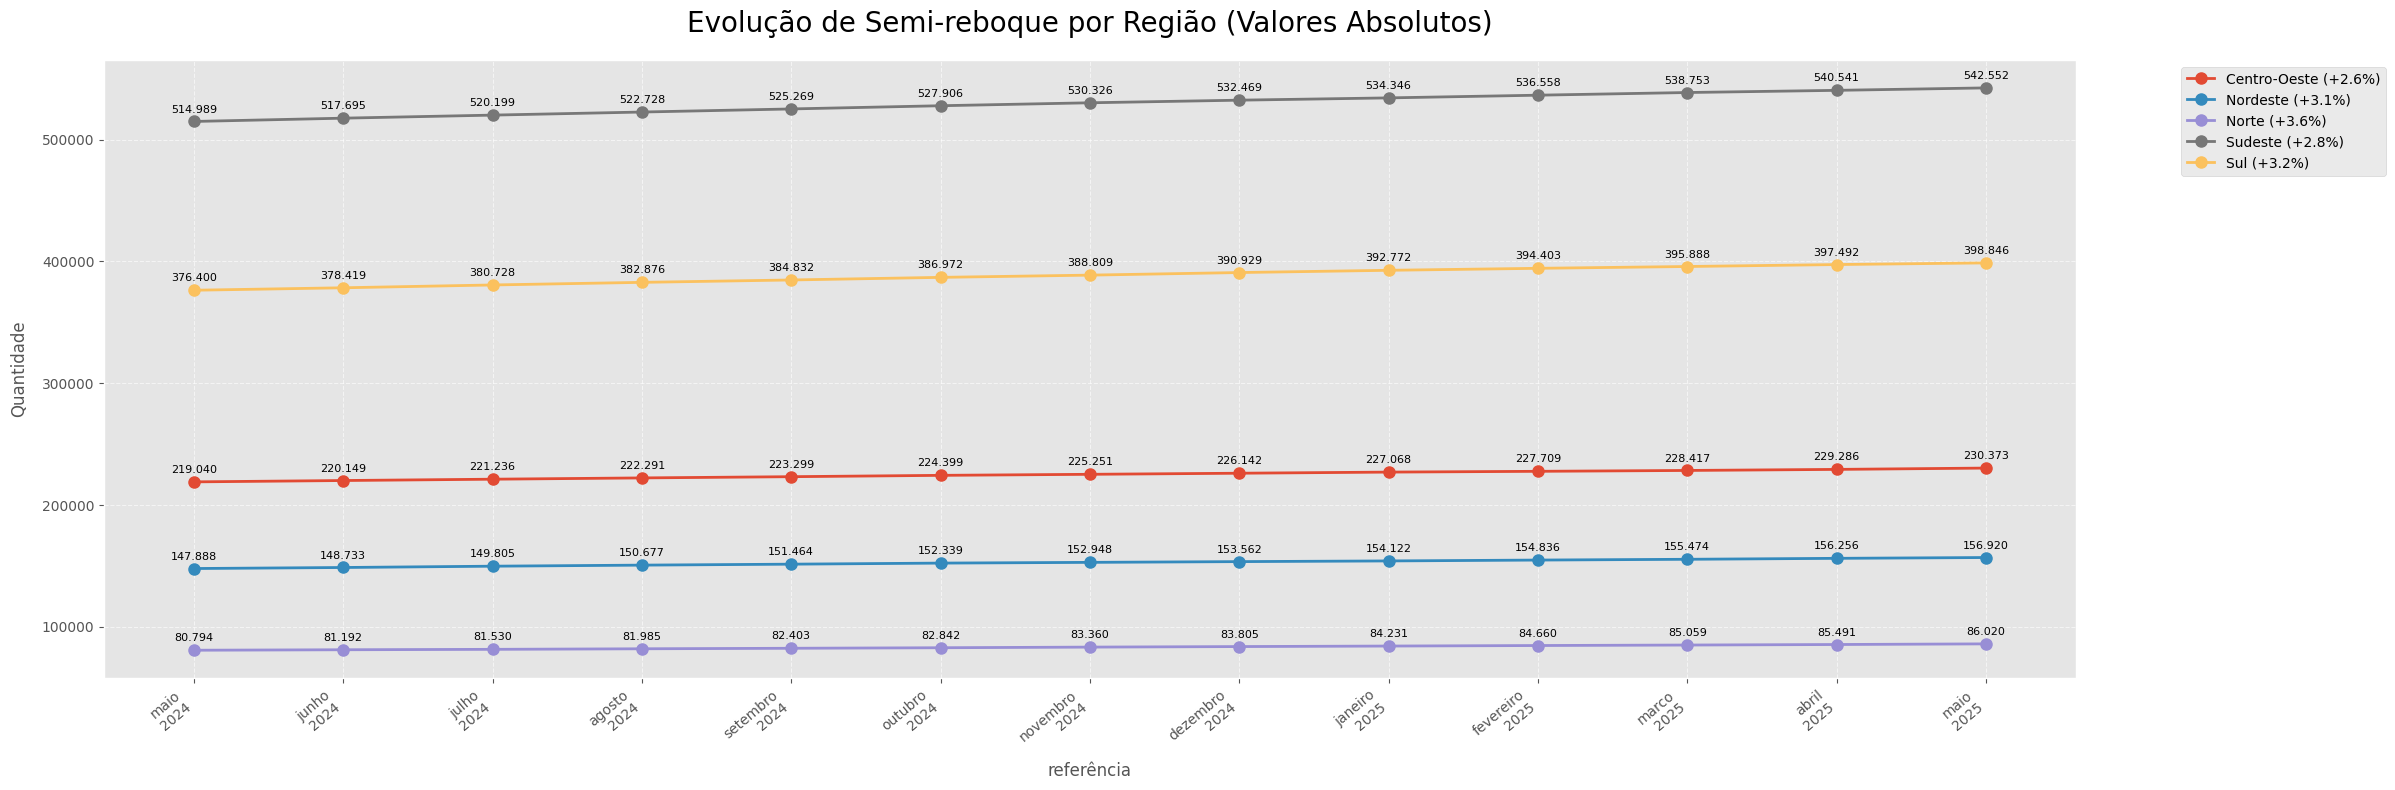

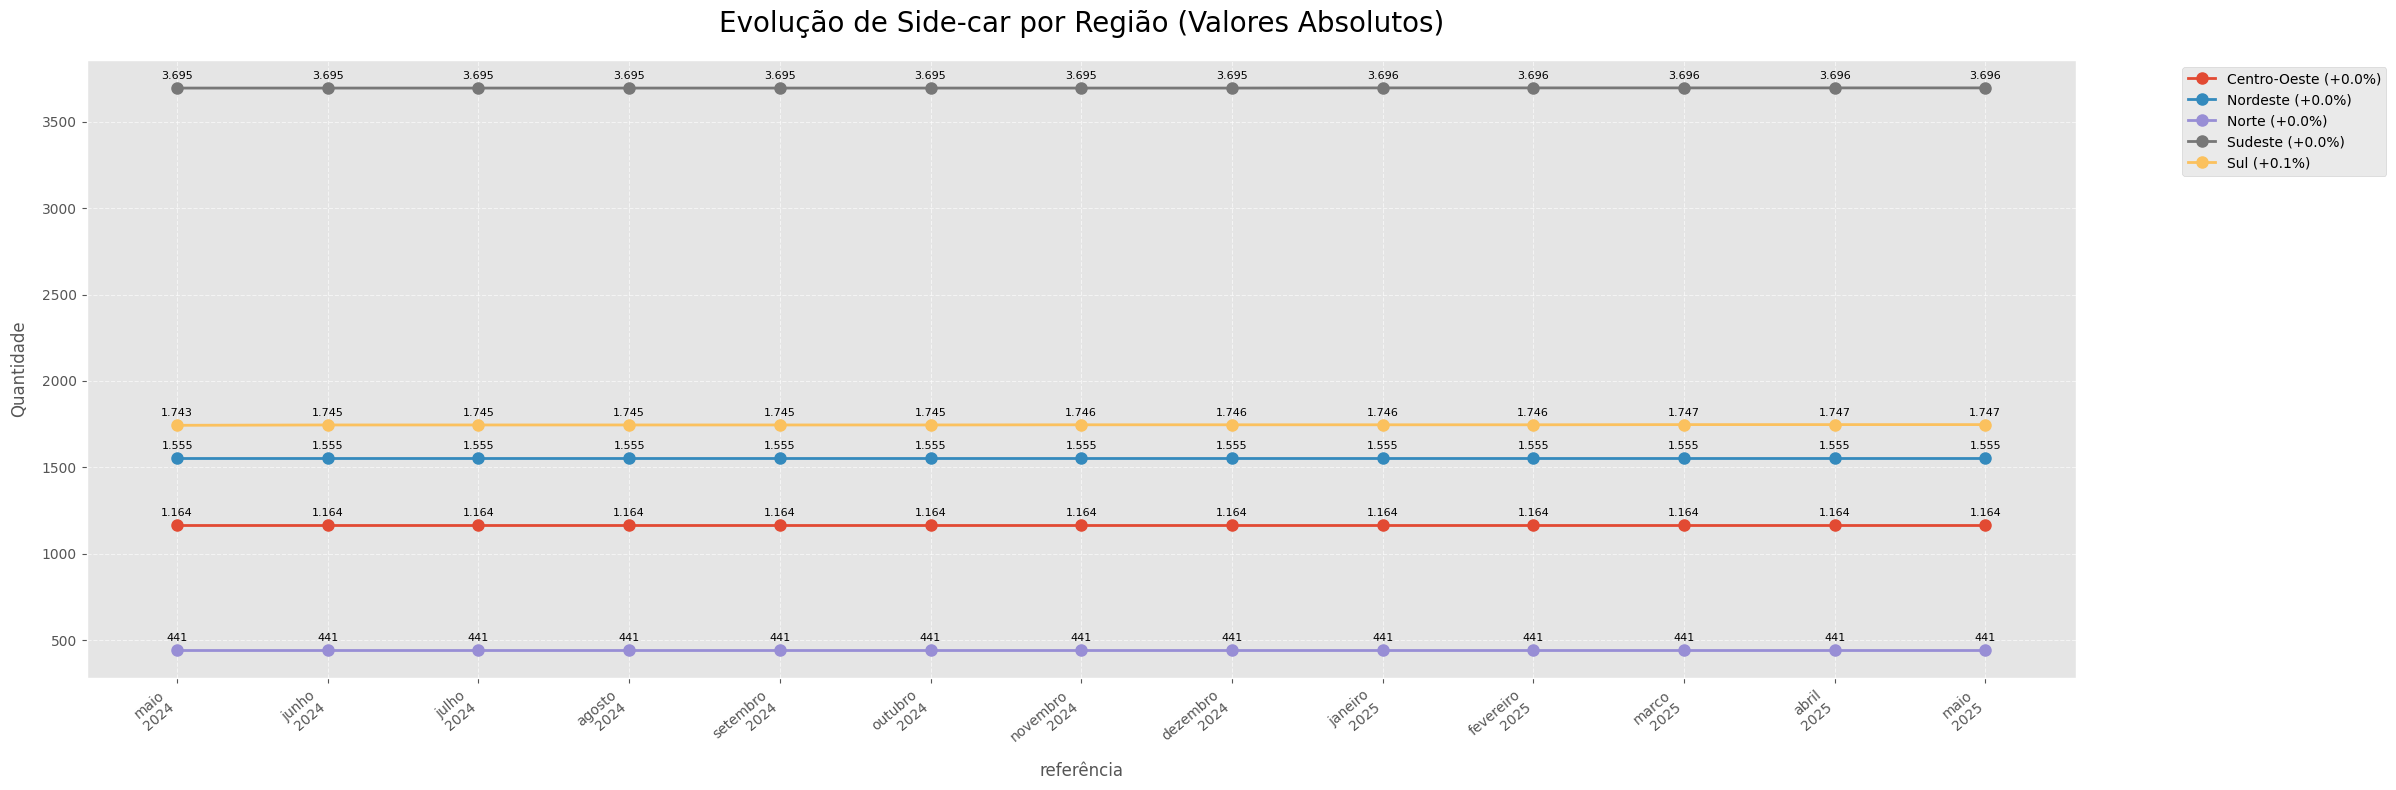

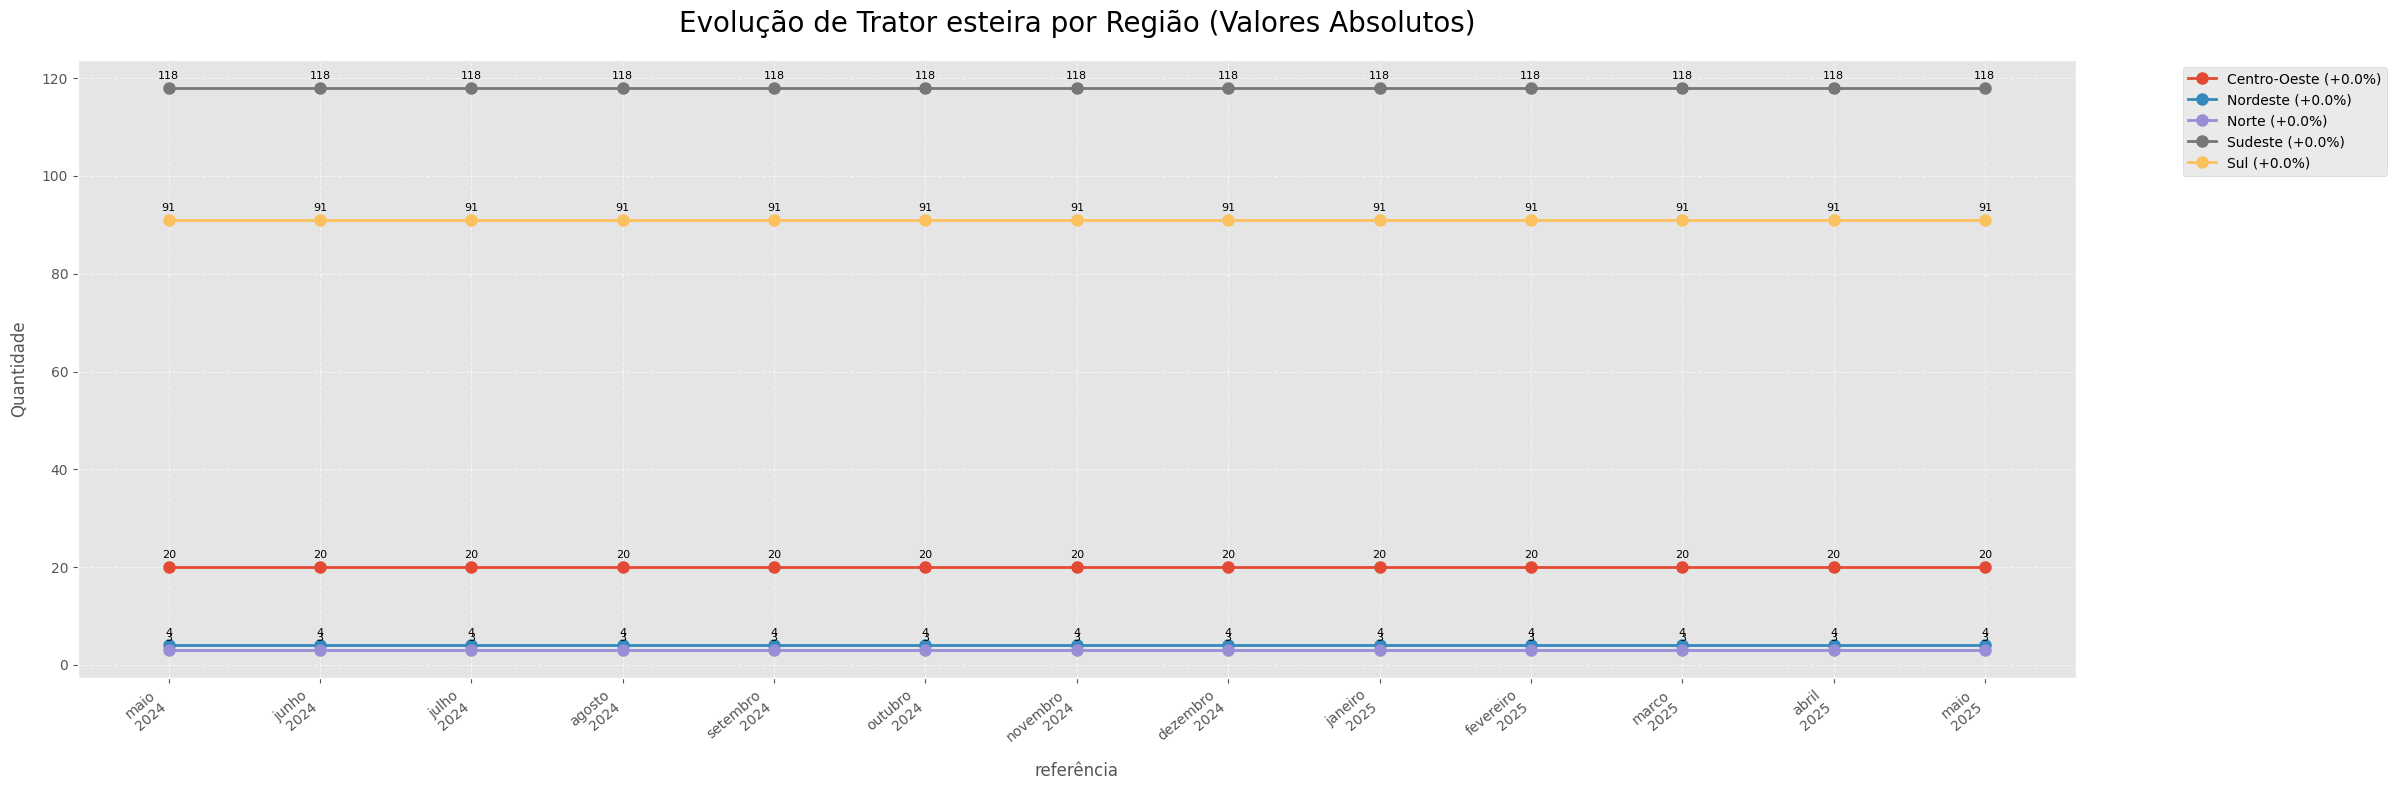

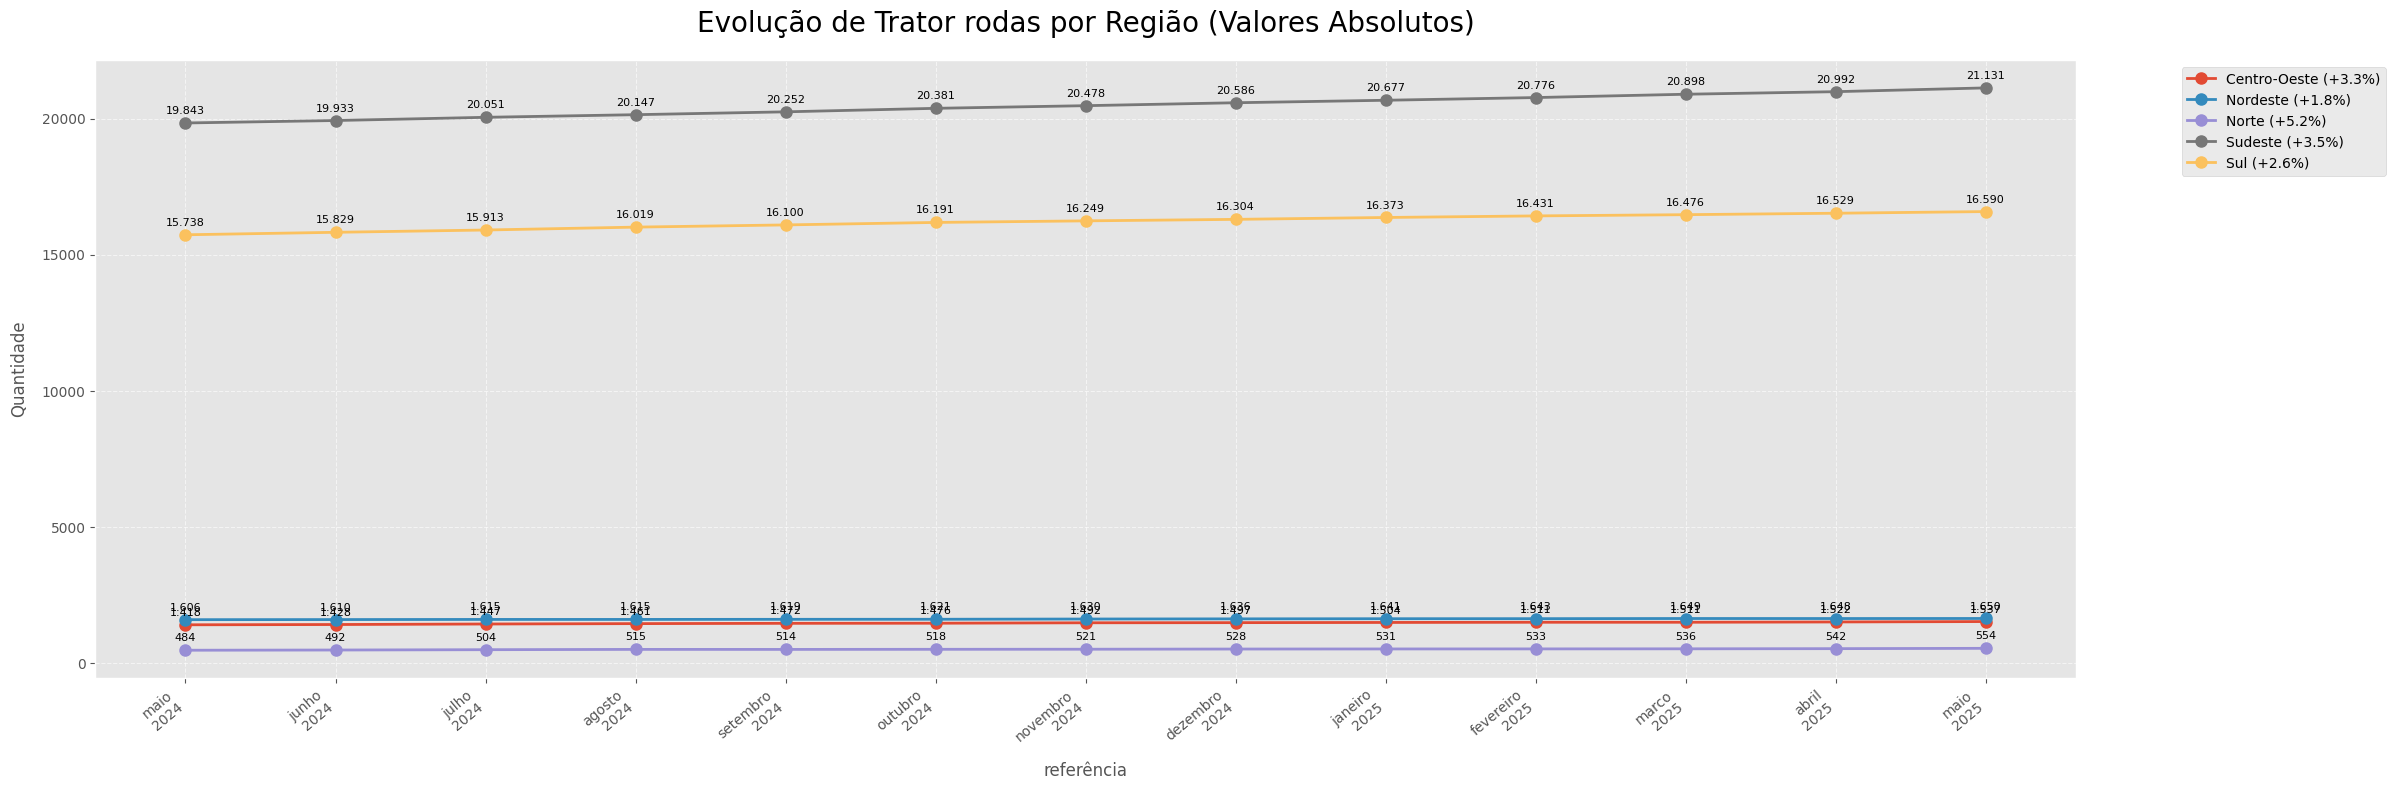

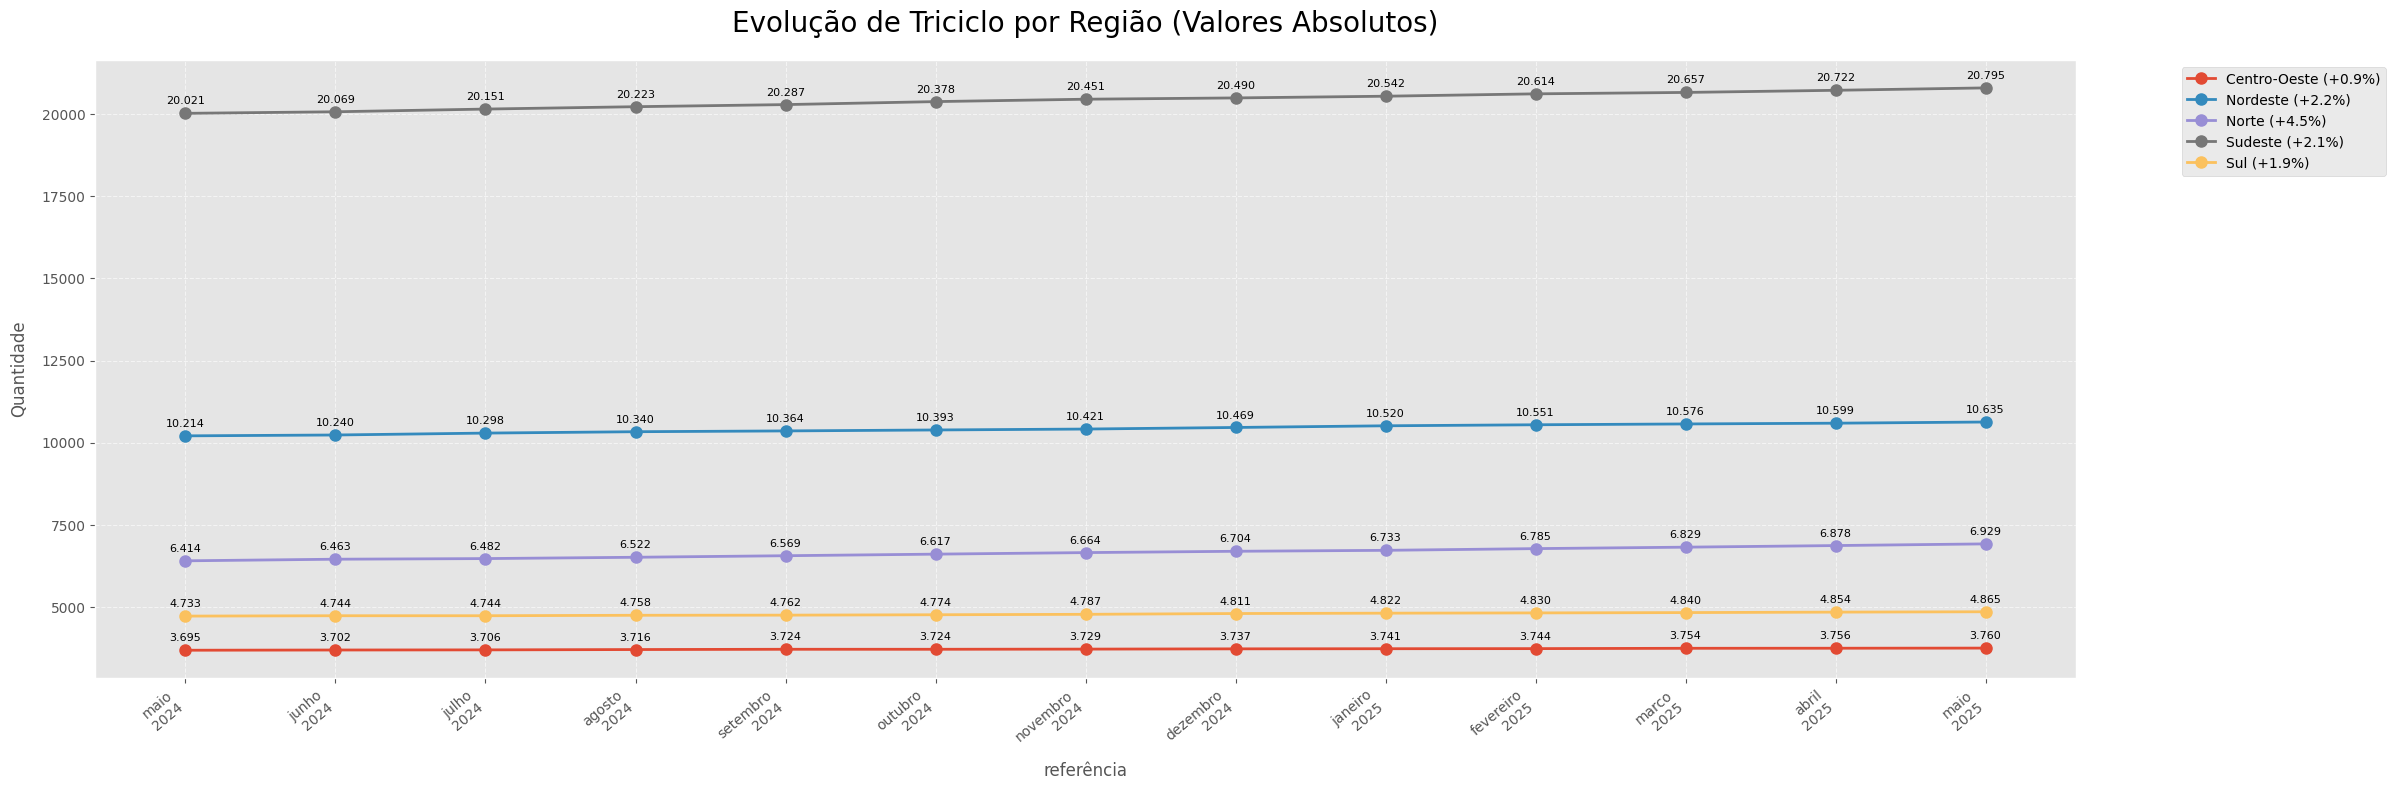

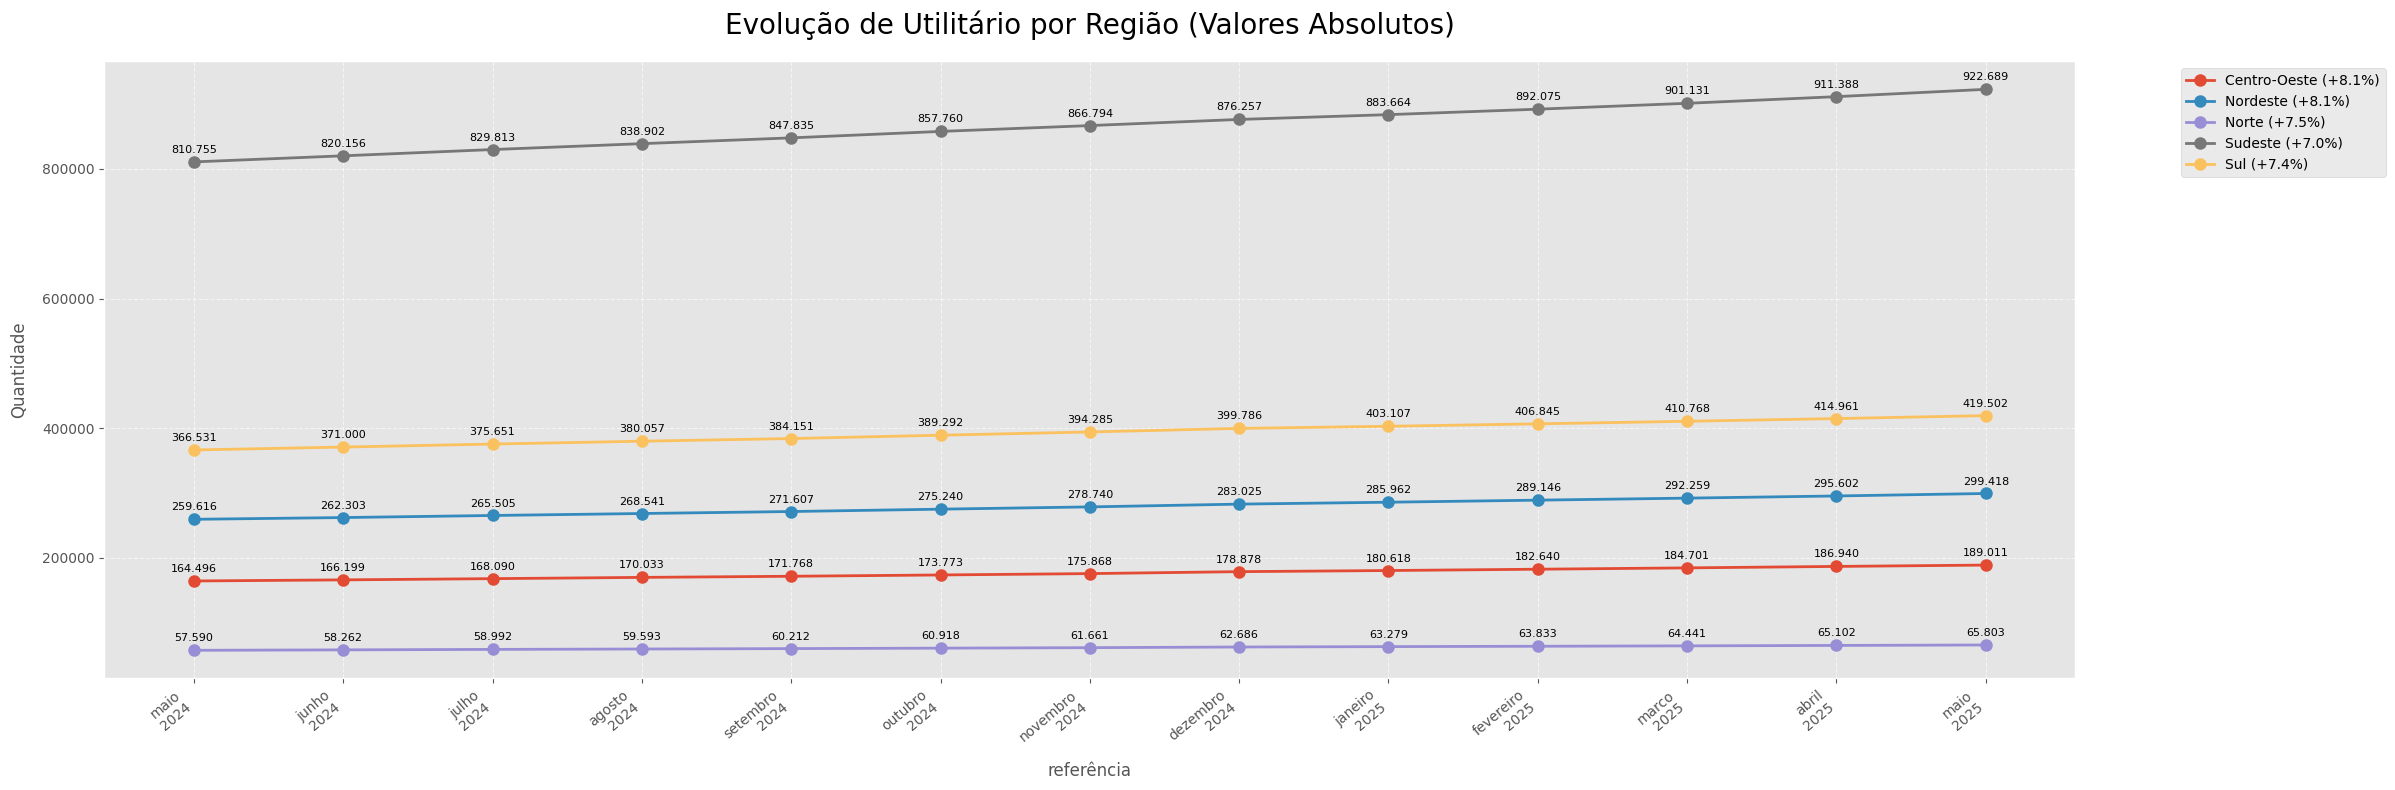

In [ ]:


df_total = pd.concat(bases, ignore_index=True)
df_total = df_total.sort_values(['ano_num', 'mes_num'])

col_nome = df_total.columns[0]

veiculos = [col for col in df_total.columns if col not in [
        col_nome, 'nível', 'referência', 'arquivo', 'mes_num', 'ano_num', 'total'
    ] and 'outros' not in col.lower()]

df_regioes = df_total[df_total['nível'] == 'Região'].copy()

for tipo in veiculos:
        df_pivot = df_regioes.pivot(index='referência', columns=col_nome, values=tipo)
        df_pivot.replace(0, pd.NA, inplace=True)
        crescimento = {}
        for coluna in df_pivot.columns:
            serie = df_pivot[coluna].dropna()
            if len(serie) > 1:
                primeiro = serie.iloc[0]
                ultimo = serie.iloc[-1]
                if primeiro != 0:
                    percent = abs((ultimo - primeiro) / primeiro) * 100
                    crescimento[coluna] = f"{percent:.1f}%"
                else:
                    crescimento[coluna] = "N/A"
            else:
                crescimento[coluna] = "N/A"
        df_pivot['mes_num'] = df_pivot.index.str.split('/').str[0].str.lower().map(MESES_PT)
        df_pivot['ano_num'] = df_pivot.index.str.split('/').str[1].astype(int)
        df_pivot.sort_values(['ano_num', 'mes_num'], inplace=True)
        df_pivot.drop(['mes_num', 'ano_num'], axis=1, inplace=True)


        plt.figure(figsize=(24, 8))
        plt.title(f"Evolução de {tipo.capitalize()} por Região (Valores Absolutos)", fontsize=20, pad=20)

        ax = df_pivot.plot(marker='o', linewidth=2, markersize=8, ax=plt.gca())
        plt.ylabel("Quantidade", labelpad=10)
        plt.grid(True, linestyle='--', alpha=0.6)

        legenda = [f"{col} (+{crescimento.get(col, 'N/A')})" for col in df_pivot.columns]
        plt.legend(legenda, bbox_to_anchor=(1.05, 1), loc='upper left')

        labels = [ref.replace('/', '\n') for ref in df_pivot.index]
        plt.xticks(np.arange(len(df_pivot.index)), labels, rotation=40, ha='right')


        for line in plt.gca().get_lines():
            for x, y in zip(line.get_xdata(), line.get_ydata()):
                if pd.notna(y):
                    label = f"{int(y):,}".replace(",", ".")
                    plt.annotate(
                        label, xy=(x, y), xytext=(0, 5),
                        textcoords="offset points", ha='center', va='bottom', fontsize=8
                    )

        plt.tight_layout()
        plt.show()

# Análise de crescimento do último ano por região

O Sudeste brasileiro mantém sua posição dominante no cenário nacional de veículos, apresentando crescimento consistente em praticamente todas as categorias analisadas. Essa região, que concentra grande parte da população e da atividade econômica do país, demonstra uma demanda contínua por diferentes tipos de transporte, desde automóveis até veículos de carga. O aumento generalizado da frota reflete não apenas o poder aquisitivo mais elevado da região, mas também a necessidade de mobilidade em grandes centros urbanos como São Paulo, Rio de Janeiro e Belo Horizonte.

### Automóveis em Ascensão Nacional

Os automóveis registraram crescimento em todas as regiões do Brasil, sem exceção. Esse fenômeno pode ser atribuído a uma combinação de fatores, incluindo a ampliação do crédito, a recuperação econômica pós-pandemia e a preferência histórica do brasileiro pelo transporte individual. Apesar disso, o Sudeste segue como o principal motor desse crescimento, com números absolutos significativamente maiores do que nas demais regiões. Enquanto o Norte e o Nordeste apresentam aumentos mais modestos, o Sul e o Centro-Oeste também mostram expansão, ainda que em ritmo menos acelerado.

### Estagnação de Modalidades Tradicionais e Nichos Específicos

Em contraste com o crescimento generalizado, algumas categorias permaneceram completamente estagnadas. O bonde, por exemplo, não registrou qualquer aumento em sua frota, mantendo-se em apenas 42 unidades em todo o país. Esse dado revela a falta de investimento em modais alternativos de transporte urbano, especialmente em um momento em que a sustentabilidade e a eficiência energética são temas prioritários. Outros veículos, como o sidecar e o trator de esteira, também não apresentaram evolução, indicando que se tratam de nichos com demanda extremamente limitada ou substituídos por tecnologias mais modernas.

### Caminhões e Veículos de Carga

A categoria de caminhões, caminhonetes e caminhões trator registrou expansão em todas as regiões, reforçando a vitalidade do setor logístico no país. Esse crescimento está alinhado com o aumento do comércio eletrônico e da demanda por transporte de mercadorias, impulsionado pela consolidação de novos polos de distribuição no interior do Brasil. A plataforma chassis, no entanto, apresentou comportamento heterogêneo: enquanto permaneceu estagnada no Norte e no Centro-Oeste, outras regiões tiveram incrementos, sugerindo variações nas necessidades de infraestrutura e transporte de cargas específicas.

###Destaque Regionail: Nordeste

O ciclomotor emergiu como um caso particularmente interessante no Nordeste, onde seu crescimento foi mais acentuado do que em qualquer outra região, ultrapassando o sudeste. Esse fenômeno pode estar relacionado ao custo-benefício desse tipo de veículo em cidades menores ou com infraestrutura viária menos desenvolvida, além de ser uma alternativa acessível para a população local. Enquanto isso, a motocicleta, liderada pelo Sudeste, tem no Nordeste seu segundo maior mercado, com números que se aproximam cada vez mais da região mais rica do país.


### Ônibus e Veículos Alternativos: Crescimento Moderado

Os ônibus tiveram um crescimento generalizado, porém sem grandes saltos, indicando uma expansão orgânica e alinhada com a demanda por transporte coletivo. Já os quadriciclos apresentaram um comportamento mais irregular: após meses de estabilidade, registraram um aumento expressivo entre julho e agosto de 2024, seguido por uma leve alta no Sul entre abril e maio de 2025. Esse movimento sugere que esse tipo de veículo, ainda pouco difundido, pode estar encontrando nichos de mercado específicos, como áreas turísticas ou propriedades rurais.

## Panorama geral da situação do mês atual no país

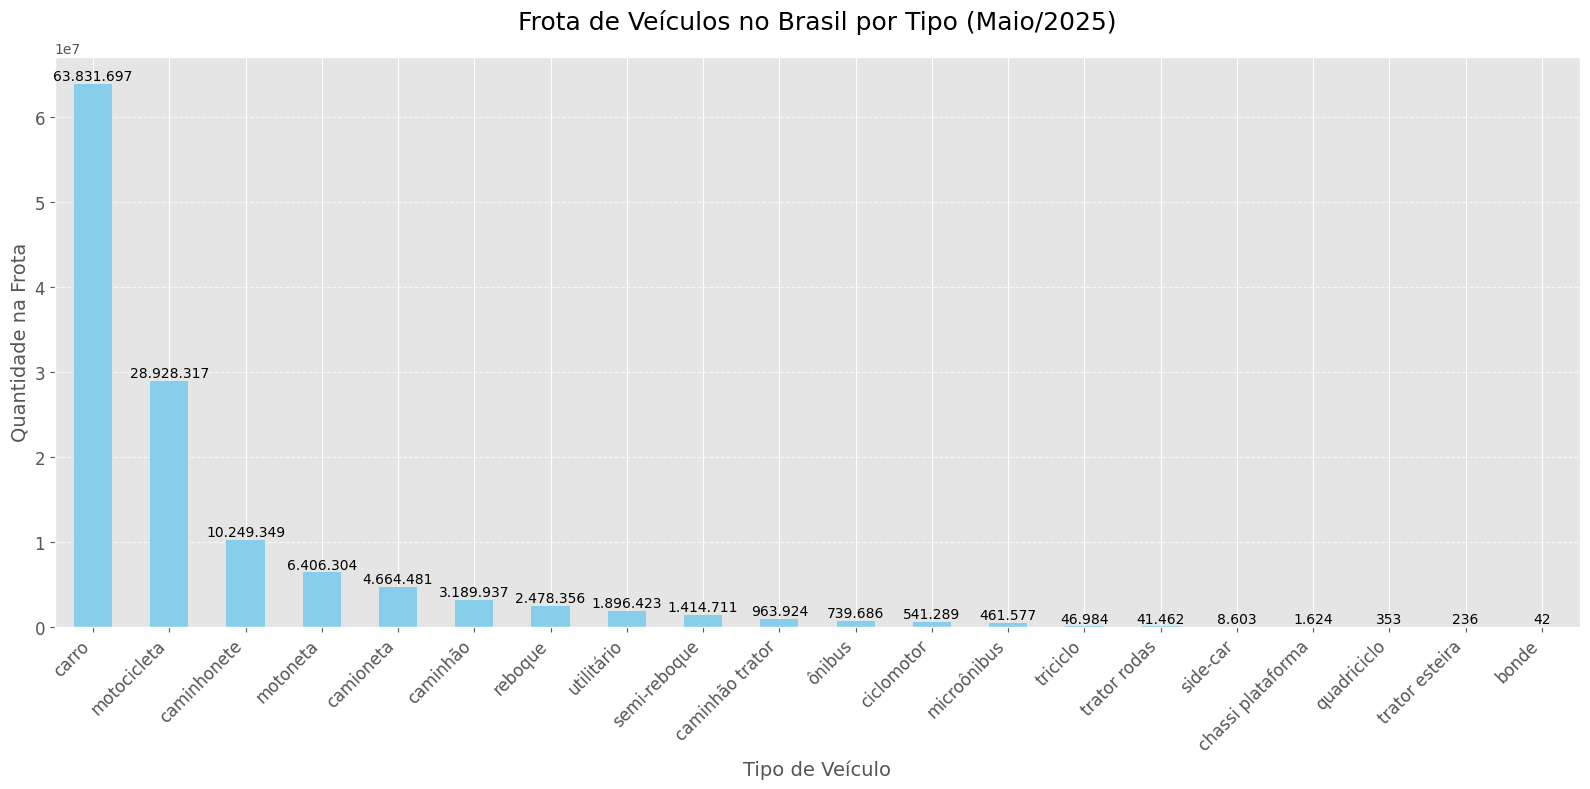

In [ ]:

df_may2025_brasil = df_total[(df_total['referência'] == 'maio/2025') & (df_total['nível'] == 'Brasil')].iloc[0]

veiculos_may2025 = df_may2025_brasil[veiculos]
veiculos_may2025_sorted = veiculos_may2025.sort_values(ascending=False)

plt.figure(figsize=(16, 8))
veiculos_may2025_sorted.plot(kind='bar', color='skyblue')

plt.title('Frota de Veículos no Brasil por Tipo (Maio/2025)', fontsize=18, pad=20)
plt.xlabel('Tipo de Veículo', fontsize=14)
plt.ylabel('Quantidade na Frota', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(veiculos_may2025_sorted):
    plt.text(i, v + 100000, formatar_numero(v), ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()

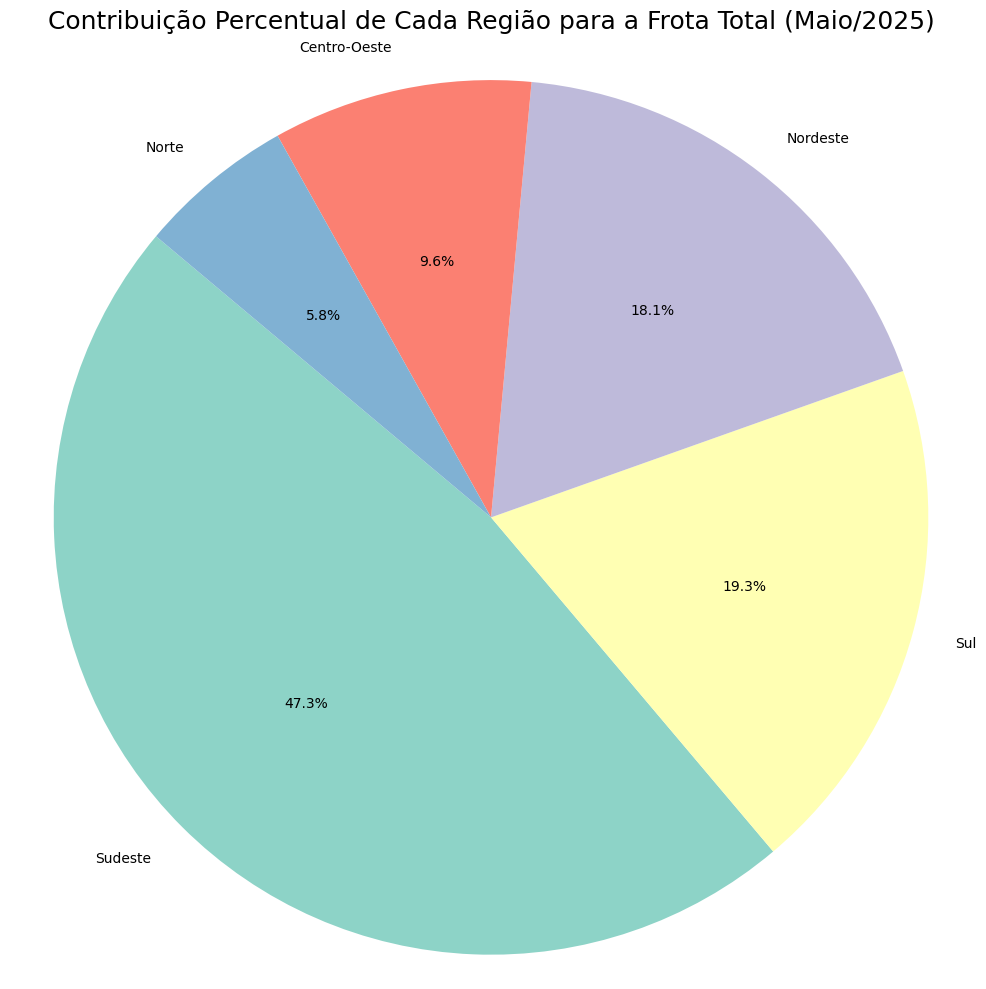

In [ ]:

df_may2025_regioes = df_total[(df_total['referência'] == 'maio/2025') & (df_total['nível'] == 'Região')].copy()

total_frota_brasil_may2025 = df_total[(df_total['referência'] == 'maio/2025') & (df_total['nível'] == 'Brasil')]['total'].iloc[0]

df_may2025_regioes['percentual'] = (df_may2025_regioes['total'] / total_frota_brasil_may2025) * 100

df_may2025_regioes_sorted = df_may2025_regioes.sort_values('percentual', ascending=False)
plt.figure(figsize=(10, 10))
plt.pie(
    df_may2025_regioes_sorted['percentual'],
    labels=df_may2025_regioes_sorted[col_nome],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)

plt.title('Contribuição Percentual de Cada Região para a Frota Total (Maio/2025)', fontsize=18, pad=20)
plt.axis('equal')

plt.tight_layout()
plt.show()

Observando os gráficos gerados para o mês corrente, é evidente mais uma vez a predominância esmagadora de automóveis e motocicletas na frota brasileira, compondo a vasta maioria dos veículos em circulação. Essa concentração em veículos de transporte individual é um reflexo das escolhas de mobilidade da população, influenciadas por fatores como infraestrutura de transporte público, custo e conveniência. A análise percentual de maio de 2025 reforça essa realidade, mostrando que, juntos, esses dois tipos de veículos representam a maior parte da frota total, com automóveis liderando significativamente. Esses gráficos, em especial o de pizza da composição por tipo de veículo, oferecem uma visualização mais clara e direta da proporção de cada modal em comparação com os gráficos de evolução regional por tipo de veículo apresentados anteriormente, facilitando a identificação dos tipos de veículos que dominam o cenário nacional.

Regionalmente, o gráfico destaca o sudeste como a região com a maior contribuição para a frota nacional em termos absolutos, seguida por Sul e Nordeste. Essa distribuição reflete as diferenças na densidade populacional, no nível de desenvolvimento econômico e na infraestrutura de transporte entre as grandes regiões do país. A maior concentração de veículos no Sudeste aponta para desafios específicos em termos de congestionamento e emissões nessa região.

É notável que, apesar dos ônibus serem um modal crucial de transporte público para milhões de brasileiros, sua porcentagem na frota total é minúscula em comparação com veículos individuais como carros e motocicletas. Essa disparidade pode indicar a necessidade de maiores investimentos e incentivos ao transporte coletivo para promover uma mobilidade mais sustentável e acessível.


## Conclusão

A análise da frota de veículos no Brasil, abrangendo tanto o período recente de maio de 2024 a maio de 2025 quanto a perspectiva histórica de 2010 a 2024, revela uma paisagem de mobilidade complexa e em constante transformação. Os dados do SENATRAN evidenciam não apenas o crescimento geral da frota, mas também as marcantes disparidades regionais e as dinâmicas particulares de cada tipo de veículo.

No curto prazo, observa-se a consolidação do Sudeste como a região com a maior frota em números absolutos, impulsionando o crescimento em diversas categorias, especialmente a de automóveis. No entanto, a análise detalhada por tipo de veículo e região aponta para tendências regionais distintas. O Nordeste, por exemplo, destaca-se pelo crescimento acentuado de ciclomotores, refletindo a busca por alternativas de transporte mais acessíveis e adaptadas à infraestrutura local. Motocicletas e motonetas também mostram relevância crescente em diversas regiões, impulsionadas por fatores como a expansão dos serviços de entrega e a preferência pelo transporte individual.

Em contraste, modalidades tradicionais como o bonde permanecem estagnadas, sinalizando a falta de investimentos em certos nichos e a preferência por outros modais. O setor de carga, representado por caminhões, caminhonetes e caminhões-trator, demonstra um crescimento sólido em todas as regiões, acompanhando a evolução da logística e do comércio.

A perspectiva de longo prazo (2010-2024) adiciona camadas importantes a essa compreensão. As oscilações observadas na frota de diferentes regiões ao longo dos anos demonstram a sensibilidade do setor a fatores macroeconômicos, sociais e até mesmo a eventos globais, como a pandemia de COVID-19, que impactou significativamente a frota de ônibus em 2020. As quedas abruptas em certas categorias em anos específicos, como a de ônibus no Norte em 2017, sugerem a influência de mudanças metodológicas, políticas públicas ou desinvestimentos pontuais.




# Referências

Estatísticas - Frota de Veículos - SENATRAN. Disponível em: <https://www.gov.br/transportes/pt-br/assuntos/transito/conteudo-Senatran/estatisticas-frota-de-veiculos-senatran>. Acesso em: 29 jun. 2025.

Simulacao_Frota_Veiculos_Regiao_2010_2024.xlsx  Disponível em: <https://github.com/AlexandreLouzada/Dados-Simulados/blob/main/Simulacao_Frota_Veiculos_Regiao_2010_2024.xlsx>. Acesso em: 29 jun. 2025.

‌